<div align="justify"><h1><b><font size="6">
  Input Assumptions for Modelling the Transport Sector in the negaWatt-BE Scenario</h1></font></div>
<div align="justify"><h2><b><font size="5">
  ENERGY DEMAND FOR THE TRANSPORT SECTOR IN BELGIUM
</h2></font></b></div>

---
<div align="justify"><h3><font size="3">
  <b> Developers:</b> LATERRE Antoine, BERNAERTS Valentine, QUOILIN Sylvain, MEYER Sébastien
</h3></font></div> 
    
---

To ensure transparency and consistency within the negaWatt-BE project, this notebook documents all key input assumptions related to the transport sector. It computes the energy demand of passengers and freight transport under sufficiency and efficiency measures over the energy transition period (2020–2050). Projections are based on statistical data from the starting reference year, and the resulting energy demand values are directly used as inputs for the PyPSA model.

> ***Note:** The reference year is 2019 instead of 2020, due to the disruptions caused by the COVID-19 pandemic in 2020. This choice ensures greater consistency and realism in the baseline and future projections.*

<font size="4"><b>Table of Contents</b></font><a class="anchor" id="contents"></a> <br>
1. [Introduction](#section_1)
    - 1.1. [Sufficiency vs Efficiency](#section_1_1)
    - 1.2. [Global Demands](#section_1_2)
        - 1.2.1. [Passenger Mobility](#section_1_2_1)
        - 1.2.2. [Freight Transport](#section_1_2_2)
        - 1.2.3. [Maritime Bunkers](#section_1_2_3)
2. [Passenger Mobility](#section_2)
    - 2.1. [Modal Shares](#section_2_1)
    - 2.2. [Carriers Shares](#section_2_2)
    - 2.3. [Final Energy Consumption](#section_2_3)
3. [Freight Transport](#section_3)
    - 3.1. [Modal Shares](#section_3_1)
    - 3.2. [Carriers Shares](#section_3_2)
    - 3.3. [Final Energy Consumption](#section_3_3)
4. [Maritime Bunkers](#section_4)
5. [Total Final Energy Consumption](#section_5)
6. [Short List of Sufficiency Assumptions](#section_6)

<font size="4"><b>References</b></font><a class="anchor" id="references"></a> <br>

* [1] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Gea Bermudez, Juan; Neuwahl, Frederik (2025). JRC-IDEES-2023. European Commission, Joint Research Centre (JRC). [Dataset].<br>
  PID: http://data.europa.eu/89h/1f0b480c-6d21-4d95-897d-20c7ca33df6f
* [2] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Tattini, Jacopo; Neuwahl, Frederik (2024). JRC-IDEES-2021: the Integrated Database of the European Energy System – Data update and technical documentation, Publications Office of the European Union, Luxembourg, 2024. [Report].<br>
  DOI: https://doi.org/10.2760/614599
* [3] Service public fédéral Mobilité et Transports (2019). Enquête monitor sur la mobilité des Belges. Bruxelles: SPF Mobilité et Transports [Report].<br>
Retrieved from: https://mobilit.belgium.be/fr/publications/enquete-monitor-sur-la-mobilite-des-belges
* [4] Service public fédéral Mobilité et Transports (2025). Enquête fédérale sur la mobilité en Belgique. Bruxelles: SPF Mobilité et Transports [Report].<br>
Retrieved from: https://mobilit.belgium.be/fr/publications/enquete-federale-sur-la-mobilite-en-belgique
* [5] Bureau fédéral du Plan (2022). Perspectives de la demande de transport à l’horizon 2040. Bruxelles: BFP [Report].<br>
Retrieved from: https://www.plan.be/fr/publications/perspectives-de-la-demande-de-transport-en
* [6] Association négaWatt (2021). Scénario négaWatt 2022-2050 [Report].<br>
Availale at: https://www.negawatt.org/Scenario-negaWatt-2022
* [7] Service public fédéral Mobilité et Transports (2022). Vision Rail 2040 – Le rail : la colonne vertébrale de la mobilité en Belgique. Bruxelles: SPF Mobilité et Transports [Report].<br>
Retrieved from: https://mobilit.belgium.be/fr/publications/le-rail-la-colonne-vertebrale-de-la-mobilite-en-belgique
* [8] Transport & Mobility Leuven (2020). Elektrificatie van het Belgische spoorwegnet of het gebruik van andere duurzamere vervoerswijzen om de dieseltractie te vervangen. Leuven: Christophe Heyndrickx, Sebastiaan Boschmans [Report].<br>
Retrieved from: https://mobilit.belgium.be/sites/default/files/publicaties%20en%20statistieken/studie_nl%20(1).pdf




<font size="4"><b>Contacts and experts in the field</b></font><a class="anchor" id="contacts"></a>

* Christophe Pauwels (christophe.pauwels@mobilit.fgov.be): person in charge of collecting and managing data related to mobility at the Belgian Federal Public Service for Mobility and Transport (enquetewwv@mobilit.fgov.be, stats.enquetes@mobilit.fgov.be), section Sustainable Mobility and Rail.

<font size="4"><b>Loading external functions</b></font><a class="anchor" id="project_functions"></a>

The functions required for this notebook are loaded here. The macroscopic data (demographic projections, etc.) contained in `demand_model_macro_nW-BE-update.ipynb` are also loaded here.

In [1]:
# Automatically reload the file if it is modified:
%load_ext autoreload
%autoreload 2
# Load the macro parameters and necessary packages:
%run ./demand_model_macro_nW-BE-update.ipynb
# Option to print and plot the results:
post_process = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

<font size="5"><b>1. Introduction</b></font> <a class="anchor" id="section_1"></a>

---

The method used to generate the energy demand projections for the transport sector follows the approach of the Joint Research Centre (JRC) of the European Commission for building the Integrated Database of the European Energy System (IDEES) [1,2]. This database compiles statistics related to passenger transport, freight transport, and maritime bunkers.

---

<font size="4"><b>1.1. Sufficiency vs Efficiency</b></font> <a class="anchor" id="section_1_1"></a>

---

To reduce primary energy consumption in the transport sector, the negaWatt-BE approach relies on two complementary strategies: energy sufficiency, acting on usefull energy demand, and energy efficiency, acting on conversion losses. These strategies are implemented through several levers, presented below, which guide the transition towards a low-energy transport system.
* $\textcolor{Orange}{\textbf{Energy Sufficiency}}$ refers to a reduction in the demand for energy-intensive activities. It is achieved through behavioral and systemic changes that reduce their usage, including modal shifts.
* $\textcolor{Orange}{\textbf{Energy Efficiency}}$ refers to technical improvements that reduce the amount of primary energy consumed per kilometer travelled or ton transported, without reducing the final transport demand.

---

<font size="4"><b>1.2. Global Demands</b></font> <a class="anchor" id="section_1_2"></a>

---

This section defines the demand in terms of *final services*. For passenger mobility, this corresponds to the equivalent annual distance travelled by the population. For freight transport and maritime bunkers, it corresponds to the equivalent annual distance travelled by all transported goods.

---

<font size="3"><b>1.2.1. Passenger Moblity</b></font> <a class="anchor" id="section_1_2_1"></a>

---

Passenger mobility is measured by the total annual distance travelled, representing the total number of kilometers covered each year by the population across all transport modes. In this study, only navigation is excluded, as it is negligible in Belgium. The **passenger mobility** is expressed in **passenger-kilometers [pkm]** for each year and includes commuting, leisure, and other mobility needs. The **passenger mobility intensity** reports the passenger mobility over the population and is expressed in **passenger-kilometers per person [pkm/person]**.

To generate passenger mobility statistics for the reference year (2019), we rely on two main sources: (i) the JRC-IDEES database, whose most recent figures date from 2023 [1,2], and (ii) the two most recent Belgian Federal Mobility Surveys, conducted in 2017 and over the period 2024–2025 [3,4]. These two sources are complementary, as the former excludes data related to active modes (walking, cycling), while the latter focuses on daily commuting within Belgium and excludes extra-territorial trips, aviation being the main representative. Although not strictly required to assess the final energy consumption of the transport sector, gentle active modes are key levers in a transition based on sufficiency. As they help illustrate their contribution to reducing the sector’s energy consumption, they are therefore included in this notebook.

For **2019**, JRC-IDEES [1,2] reports a value of *172,657 Gpkm* covering mobility by road, rail and air. Based on reports from the Belgian Federal Public Service for Mobility and Transport [3,4], we estimate that in the same year additional contributions amounted at *7,000 Gpkm* for cycling and *3,000 Gpkm* for walking.
The total therefore amounts at **182,657 Gpkm**, which corresponds to an average total mobility intensity of **15.979 pkm/person**. 


In [2]:
# Inputs - Define Sufficiency Scenario Data (SUF)
ref_PM_spe = 182.65651e+9/population_dict[2019]


> ***Comment:** Data from the surveys made by the Belgian Federal Public Service for Mobility and Transport [3,4] are exclusively used to assess the passenger-kilometers related to walking and cycling as proper commuting modes (not leisure, sport, etc.).*

> ***Comment:** The Belgian Federal Public Service for Mobility and Transport plans on publishing modal passenger-kilometers for commuting by 2027 (cfr. christophe.pauwels@mobilit.fgov.be).*

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

Excluding gentle modes, from 2000 to 2019, the total mobility intensity has grown by about *+780 pkm/person*, which is equivalent +5.5% [1,2]. This is driven by aviation (intra and extra Europe), which has grown by about *+1160 pkm/person* (or +8.1% w.r.t. total mobility intensity), and also due to rail (passenger trains and urban light rails) which has grown by about *+340 pkm/person/year* (or +2.4% w.r.t. total mobility intensity). In the meantime, road (two-wheeelers, cars and buses) has decreased by about *-720 pkm/person* (or -5.0% w.r.t. total mobility intensity) [1,2].
For its part, the Federal Planning Bureau, excluding aviation but including active modes, estimates that from 1990 to 2019 the total mobility intensity has grown by about *+1830 pkm/person* [5].

Despite this increase in the mobility intensity for the past 30 years, we believe this trend can be reversed, notably because of the expansion of teleworking [5], and through a higher share of urban housing and a prioritisation of closer tourist destinations. Population ageing and increased transportation costs should also reduce the mobility intensity [5]. This reversed trend assumption is further supported by the fact that the Federal Planning Bureau estimates that, under unchanged policies and excluding aviation from the projection, mobility intensity could decrease by around *-100 pkm/person* by 2040 [5].

In light of this, we project a **-10% reduction** in global **mobility intensity** by **2050** w.r.t. the 2019 level. This -10% assumption leads to an estimated **14.381 pkm/person** by 2050 (*-1.598 pkm/person*).
We attribute a significant share of this reduction (around half of it) to a decrease in the number of long-haul flights, for which modal shift is hardly feasible and whose decarbonisation remains uncertain (limited availability of Sustainable Aviation Fuels (SAF), etc.). More details are provided below.


In [3]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_PM_spe = -0.10
# Outputs - Sufficiency Scenario Data (SUF)
SUF_data = {"PM intensity [pkm/person]": linear_growth(2019, ref_PM_spe, 
                                                       2050, ref_PM_spe*(1+pro_PM_spe), years)}
df_SUF = pd.DataFrame(SUF_data, index=years)
df_SUF["popuplation [person]"] = df_SUF.index.map(population_dict)
df_SUF["PM total [Gpkm]"] = df_SUF["PM intensity [pkm/person]"]*df_SUF["popuplation [person]"]*1e-9


> ***Comment:** This -10% assumption is further supported by the post-COVID-19 recovery of mobility: it took more than five years for the mobility intensity to return to its pre-crisis level (it had dropped by about -30% from 2019 to 2020) [1,2]. This moderate pace of recovery illustrates the feasibility of reducing the mobility intensity.*

> ***Comment:** Our -10% reduction is a conservative assumption with respect to the négaWatt 2022-2050 scenario [6] for France, which assumes a 23% reduction.<br/>
> /!\ Need to check if we can find this -23% in the nW scenario - haven't found it so far /!\ *

> ***Comment:** Should also further motivate the -10% drop: teleworking and urban housing are maybe not enough.*


---

<font size="3"><b>1.2.2. Freight Transport</b></font> <a class="anchor" id="section_1_2_2"></a>

---

**Freight transport** is measured by the total annual distance over which goods are transported, representing the total number of kilometers covered each year by the mass of all goods across all transport modes. In this study, international transport through maritine bunkers is adressed in a separate section due to the disproportionate contribution of the Port of Antwerp compared with other activities in Belgium. This indicator is expressed in **ton-kilometers [tkm]**.

To generate freight transport statistics for the reference year (2019), we rely on the JRC-IDEES database, whose most recent figures date from 2023 [1,2].

For 2019, JRC-IDEES [1,2] reports a value of **80,176 Gtkm** covering transport by road, rail, air and domestic navigation. 
Reported to the population, this corresponds to an average total tansport intensity of **7.014 tkm/person**.


In [4]:
# Inputs - Define Sufficiency Scenario Data (SUF)
ref_FT_spe = 80.17566e+9/population_dict[2019]


<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

From 2000 to 2019, the average tansport intensity increased by more than +25%, rising from *5.548 tkm/person* in 2000 to *7.014 tkm/person* in 2019 [1,2]. Although the 2008 economic crisis caused this value to drop to *5.703 tkm/person* in 2009, the growth slowdown was later offset, such that the upward trend remained relatively steady overall between 2000 and 2016 (with a peak of *7.532 tkm/person* reached in that year). Since then, the upward trend has levelled off, with the value fluctuating around *7.000 tkm/person/year*.

In view of the current stabilisation of this metric, we consider it reasonable to project a slight decrease. This is motivated, on the one hand, by a reduction in the consumption of material goods and, on the other hand, by the relocation of certain manufacturing activities and the development of short supply chains and local consumption patterns (e.g. local agriculture, etc.). 

In light of this, we project a **-10% reduction** in average total individual ton-kilometers by 2050 w.r.t. the 2019 level.


In [5]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_FT_spe = -0.10
# Outputs - Sufficiency Scenario Data (SUF)
df_SUF["FT intensity [tkm/person]"] = linear_growth(2019, ref_FT_spe, 
                                                    2050, ref_FT_spe*(1+pro_FT_spe), years)
df_SUF["FT total [Gtkm]"] = df_SUF["FT intensity [tkm/person]"]*df_SUF["popuplation [person]"]*1e-9


> ***Comment:** Need to compare this projection with other scenarios.*

> ***Comment:** Freight is usually reported to GWP instead of population [5]. Yet, GWP is out of the scope of this work. We hence stay with population.*

> ***Comment:** Note that the value for 2023 is 6.455 tkm/person, which is -8% compared to 2019. The -10% is thus perfectly realistic.*


---

<font size="3"><b>1.2.3. Maritime Bunkers</b></font> <a class="anchor" id="section_1_2_3"></a>

---

> ***Comment:** TODO! Excluded from nW-BE scenario for now...*

---

<font size="5"><b>2. Passenger Mobility</b></font> <a class="anchor" id="section_2"></a>

---

This section defines the modal shares (type of transport mode) and carrier shares (type of powertrain) to allocate the Final Energy Consumption across the different transport modes and carriers. 

---

<font size="4"><b>2.1. Modal Shares</b></font> <a class="anchor" id="section_2_1"></a>

---

This section defines the modal shares, which are expressed in percentages of total passenger-kilometers. Walking and cycling (gentle modes) are explicitly included in the distribution, as well as aviation.

The modal shares of the powered modes for the reference year (2019) are based on JRC-IDEES [1,2], while the gentle modes are based on the last two surveys from the Belgian Federal Public Service for Mobility and Transport [3,4]. Note that domestic flights and navigation are excluded due to their negligible contribution.


In [6]:
# Inputs - Modal Repartition [Gpkm] for reference year (2019)
ref_PM_mod_abs = {
    'pedestrian':           3.00000, # From Belgian Federal Public Service for Mobility and Transport
    'bicycle':              7.00000, # From Belgian Federal Public Service for Mobility and Transport
    'two-wheeler':          1.75208, # From JRC-IDEES
    'tram&metro':           1.47211, # From JRC-IDEES
    'bus&coach':           13.68139, # From JRC-IDEES
    'car':                107.44465, # From JRC-IDEES
    'train-conventional':  10.43600, # From JRC-IDEES
    'train-high speed':     1.56400, # From JRC-IDEES
    'plane-intra EU':      15.59146, # From JRC-IDEES
    'plane-extra EU':      20.71483, # From JRC-IDEES
}
ref_PM_abs = sum(ref_PM_mod_abs.values())
if abs((ref_PM_abs-df_SUF["PM total [Gpkm]"][2019])/df_SUF["PM total [Gpkm]"][2019]*100) > 1e-5: print("Entry values in 'ref_PM_mod_abs' are not correct!")
# Outputs - Modal Shares [%] and Modal Repartition [pkm/person] for reference year (2019)
ref_PM_mod_rel = {k: v/ref_PM_abs*100               for k, v in ref_PM_mod_abs.items()} # [%]
ref_PM_mod_spe = {k: v/df_SUF["popuplation [person]"][2019]*1e+9 for k, v in ref_PM_mod_abs.items()} # [pkm/person]


> ***Comment:** The Belgian Federal Public Service for Mobility and Transport gives 10,84900 Gtkm for train (https://mobilit.belgium.be/fr/mobilite-durable/enquetes-et-resultats/chiffres-cles-de-la-mobilite, from SNCB). This is quite similar to our JRC-IDEES value!*

> ***Comment:** For 2017, the MONITOR survey from Belgian Federal Public Service for Mobility and Transport gives 107,033 Gpkm by car (= 35 km/day/person x (55% + 19% modal shares) x 365 days x 11.322.088 people) [3]. The same year, IDEES gives 106,940 Gpkm [1,2]. This is about -0.1% deviation, which is more than acceptable!<br/>
> But regarding train, the MONITOR survey gives 17,357 Gpkm (= 35 km/day/person x 12% modal share x 365 days x 11.322.088 people) [3], while IDEES gives 10,364 Gpkm [1,2]. This is about -40% deviation. The origin of this discrepency should be further investigated!*

> ***Comment:** Data for cycling and walking should be refined. The Belgian Federal Public Service for Mobility and Transport (christophe.pauwels@mobilit.fgov.be) has told us that estimates for 2024-2025 are 7,2 Gpkm for cycling an 4 Gpkm for walking. Other sources should also be investigated.*

> ***Comment:** The Federal Planning Bureau estimates that 172,7 Gpkm were travelled in 2019 (excluding aviation) [5]. Of these, 5.7 Gpkm were travelled on foot and by bicycle.* 

> ***Comment:** The Federal Planning Bureau estimates a mobility intensity of 15.105 pkm/person in 2019 (excluding aviation) [5]. Accounting for aviation (3.176 pkm/person), this value is 2.302 pkm/person higher than ours (+18%).*


<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

By 2019, 58,8% of all passenger-kilometres were made by car while 19,9% were by plane. The remaining 21,3% were shared among public transport, cycling, walking, and other modes. Cars (with an average occupancy rate of 1,20 [3,4] - 1,22 [1,2]) and aviation together thus accounted for nearly 80% of total passenger-kilometres in 2019. As these modes of transport are also the most energy-intensive and therefore the most greenhouse-gas-emitting, it is essential to promote modal shift whenever possible, and to limit their use when not.

Although fossil-fuelled cars are gradually being replaced by battery electric vehicles, we believe that a fair transition should limit reliance on this individual mode of transport. Replacing all internal combustion engine cars with electric cars and without any modal shift does not seem desirable for several reasons, the main ones being (i) the pressure on raw materials (some of which are critical and also needed for other clean technologies) and (ii) the very large land footprint of car-based mobility, particularly in urban areas.

With regard to aviation, we believe that short-haul flights should shift towards less energy-intensive modes of transport wherever possible. The use of Sustainable Aviation Fuels (SAF) should be prioritised for long-haul flights, for which modal shift is hardly feasible. Nevertheless, due to the limited availability and potential of SAF, as well as the technological and economic challenges of alternative propulsion systems (batteries, hydrogen, etc.), a reduction in very long-distance travel appears essential to reduce the overall environmental footprint.

We therefore set an overall objective of **reducing** the individual demand for **extra-Europe flights** by **-40%**, and of achieving a **modal shift** for **50%** of the **intra-Europe flights** towards **international train services**. Regarding **passenger cars**, we aim at a **modal shift** for **30%** of the **displacements** and an increased adoption of **carpooling**. More details are provided below.


<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #dcdcdc; border-radius: 5px;">
    <strong>Note:</strong> 
    Assuming a round trip to a destination 9.000 km away (such as Brussels–Shanghai or Brussels–Los Angeles), i.e. 18.000 km in total, and using 2019 data (20.715 Gpkm of long-haul flights [1,2]), we can infer that about 150.0833 people could have made such a trip in that year, i.e. exactly 10% of the population. If the total volume of long-haul flights were reduced by -40% by 2050, decreasing to 12,429 Gpkm, then only about 690.500 people could make such a trip, i.e. about 5.5% of the population. Looked at from another perspective, for the same overall mobility budget, the entire Belgian population could make such a trip roughly once every 18 years, i.e. nearly five times over a lifetime. This target of a 40% reduction in long-haul flights therefore appears both realistic and socially acceptable.
</d
    ing.

---

<font size="3"><b>2.1.1. Aviation</b></font> <a class="anchor" id="section_2_1_1"></a>

---

Reducing by **-40%** the individual demand of **extra-Europe flights** from 2019 to 2050 means shifting from *1.812 pkm/person* to *1.087 pkm/person* (**-725 pkm/person**).
The **modal share** of extra-Europe flights hence decreases from **11,3%** in 2019 to **7,6%** in 2050.

In [7]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_PM_spe_avi_lng = -0.40
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe = {'plane-extra EU':   (1+pro_PM_spe_avi_lng)*ref_PM_mod_spe['plane-extra EU']} # [pkm/person]
trg_PM_mod_abs = {'plane-extra EU':      trg_PM_mod_spe['plane-extra EU']*df_SUF["popuplation [person]"][2050]*1e-9} # [Gpkm]
trg_PM_mod_rel = {'plane-extra EU':      trg_PM_mod_spe['plane-extra EU']/df_SUF["PM intensity [pkm/person]"][2050]*100} # [%]

Therefore, from the overall reduction in mobility intensity of *-1.598 pkm/person* between 2019 and 2050, we infer that nearly *45%* of this decrease is due to the reduction in extra-European flights (*-725 pkm/person*).

For the remainder of the analysis, we assume that the remaining *55%* of the reduction in mobility intensity (*-873 pkm/person*) comes from all other transport modes combined. This means that, out of the targeted 10% reduction in overall mobility intensity, *5,5%* still needs to be achieved through these other modes.
Thus, of the 1.364 pkm/person travelled by intra-European flights in 2019, 1.280 pkm/person are initially projected for 2050. 

In [8]:
# Calculation of reductions in mobility intensity
dlt_PM_spe_avi_lng = pro_PM_spe_avi_lng*ref_PM_mod_spe['plane-extra EU'] # [pkm/person]
dlt_PM_spe         = pro_PM_spe        *ref_PM_spe                       # [pkm/person]
rem_dlt_PM_rel     = 1 - dlt_PM_spe_avi_lng/dlt_PM_spe                   # [-]
rem_dlt_PM_abs     = rem_dlt_PM_rel        *dlt_PM_spe                   # [pkm/person]
red_PM_rel      = (1+rem_dlt_PM_abs/(ref_PM_spe-ref_PM_mod_spe['plane-extra EU'])) # [-]
trg_PM_mod_spe_ped     = red_PM_rel*ref_PM_mod_spe['pedestrian']         # [pkm/person]
trg_PM_mod_spe_bic     = red_PM_rel*ref_PM_mod_spe['bicycle']            # [pkm/person]
trg_PM_mod_spe_mot     = red_PM_rel*ref_PM_mod_spe['two-wheeler']        # [pkm/person]
trg_PM_mod_spe_car     = red_PM_rel*ref_PM_mod_spe['car']                # [pkm/person]
trg_PM_mod_spe_bus_cch = red_PM_rel*ref_PM_mod_spe['bus&coach']          # [pkm/person]
trg_PM_mod_spe_trm_met = red_PM_rel*ref_PM_mod_spe['tram&metro']         # [pkm/person]
trg_PM_mod_spe_trn_cnv = red_PM_rel*ref_PM_mod_spe['train-conventional'] # [pkm/person]
trg_PM_mod_spe_trn_spd = red_PM_rel*ref_PM_mod_spe['train-high speed']   # [pkm/person]
trg_PM_mod_spe_avi_srt = red_PM_rel*ref_PM_mod_spe['plane-intra EU']     # [pkm/person]
sum_PM_gen = trg_PM_mod_spe_ped     + trg_PM_mod_spe_bic
sum_PM_rod = trg_PM_mod_spe_mot     + trg_PM_mod_spe_car     + trg_PM_mod_spe_bus_cch
sum_PM_ral = trg_PM_mod_spe_trm_met + trg_PM_mod_spe_trn_cnv + trg_PM_mod_spe_trn_spd
sum_PM_avi = trg_PM_mod_spe_avi_srt
sum_PM_tot = sum_PM_gen + sum_PM_rod + sum_PM_ral + sum_PM_avi
if abs((sum_PM_tot + trg_PM_mod_spe['plane-extra EU']-df_SUF["PM intensity [pkm/person]"][2050])/df_SUF["PM intensity [pkm/person]"][2050]*100) > 1e-5: 
    print("There is an error in forecasting the 2050 mobility intensity!")


> ***Comment:** Check that these calculations are correct and the modal shifts are effectively reported below.*

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As introduced above, we aim to achieve a **modal shift** for **50%** of these inta-Europe trips (total 1.280 pkm/person in 2050). Only **640 pkm/person** therefore remain allocated to **intra-European flights**.
Of this 50% modal shift, **25%** is allocated to **high-speed tains** (320 pkm/person), **20%** to **conventional** (256 pkm/person), and finally **5%** to **coaches** (64 pkm/person).

In [9]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_PM_spe_avi_srt            = -0.50
sft_PM_rel_avi_srt_to_trn_cnv = +0.25
sft_PM_rel_avi_srt_to_trn_spd = +0.20
sft_PM_rel_avi_srt_to_cch     = +0.05
if abs(pro_PM_spe_avi_srt+sft_PM_rel_avi_srt_to_trn_cnv+sft_PM_rel_avi_srt_to_trn_spd+sft_PM_rel_avi_srt_to_cch) > 1e-15: 
    print("There is an error in the modal shift for the 2050 intra-Europe flights!")
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['plane-intra EU'] = (1+pro_PM_spe_avi_srt)*trg_PM_mod_spe_avi_srt # [pkm/person]
trg_PM_mod_abs['plane-intra EU'] = trg_PM_mod_spe['plane-intra EU']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['plane-intra EU'] = trg_PM_mod_spe['plane-intra EU']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]
# Modal shit - Report to other modes
sft_PM_abs_avi_srt_to_trn_cnv = sft_PM_rel_avi_srt_to_trn_cnv*trg_PM_mod_spe_avi_srt
sft_PM_abs_avi_srt_to_trn_spd = sft_PM_rel_avi_srt_to_trn_spd*trg_PM_mod_spe_avi_srt
sft_PM_abs_avi_srt_to_cch     = sft_PM_rel_avi_srt_to_cch    *trg_PM_mod_spe_avi_srt

---

<font size="3"><b>2.1.2. Passenger Car</b></font> <a class="anchor" id="section_2_1_2"></a>

---

Car travel accounted for nearly 60% of the modal share in 2019 (9.399 pkm/person), making it by far the dominant mode of transport.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As discussed above, we aim to reduce the modal share of cars for daily travel. We therefore target a **modal shift** for **30%** of **trips** currently made by car by 2050 (**-2.646 pkm/person**).
We prioritise a shift towards public transport (+882 pkm/person for buses, +706 pkm/person for trains, and +265 pkm/person/year for trams and metro), towards active modes (+617 pkm/person for cycling and +88 pkm/person for walking), and towards two-wheelers (+88 pkm/person).

In [10]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_PM_spe_car            = -0.30
sft_PM_rel_car_to_bus     = +0.10
sft_PM_rel_car_to_trn_cnv = +0.08
sft_PM_rel_car_to_byc     = +0.07
sft_PM_rel_car_to_trm_met = +0.03
sft_PM_rel_car_to_mot     = +0.01
sft_PM_rel_car_to_ped     = +0.01
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['car'] = (1+pro_PM_spe_car)*trg_PM_mod_spe_car # [pkm/person]
trg_PM_mod_abs['car'] = trg_PM_mod_spe['car']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['car'] = trg_PM_mod_spe['car']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]
# Modal shit - Report to other modes
sft_PM_abs_car_to_bus     = sft_PM_rel_car_to_bus    *trg_PM_mod_spe_car
sft_PM_abs_car_to_trn_cnv = sft_PM_rel_car_to_trn_cnv*trg_PM_mod_spe_car
sft_PM_abs_car_to_bic     = sft_PM_rel_car_to_byc    *trg_PM_mod_spe_car
sft_PM_abs_car_to_trm_met = sft_PM_rel_car_to_trm_met*trg_PM_mod_spe_car
sft_PM_abs_car_to_mot     = sft_PM_rel_car_to_mot    *trg_PM_mod_spe_car
sft_PM_abs_car_to_ped     = sft_PM_rel_car_to_ped    *trg_PM_mod_spe_car


> ***Comment:** The modal shift from cars to cycling could be greater. Conversely, the shift towards buses, trams and metro may be ambitious if service coverage and frequency are not significantly improved.*

> ***Comment:** Check that the modal shifts are effectively reported below.*

---

<font size="3"><b>2.1.3. Train</b></font> <a class="anchor" id="section_2_1_3"></a>

---

As a result of the modal shifts away from aviation and cars, the modal share of rail (both conventional and high-speed) increases.
Passenger-kilometres for **conventional trains** increase by **+969 pkm/person** (doubled), while **high-speed trains** increase by **+248 pkm/person** (tripled).


In [11]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['train-conventional'] = trg_PM_mod_spe_trn_cnv+sft_PM_abs_avi_srt_to_trn_cnv+sft_PM_abs_car_to_trn_cnv # [pkm/person]
trg_PM_mod_abs['train-conventional'] = trg_PM_mod_spe['train-conventional']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['train-conventional'] = trg_PM_mod_spe['train-conventional']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]
trg_PM_mod_spe['train-high speed']   = trg_PM_mod_spe_trn_spd+sft_PM_abs_avi_srt_to_trn_spd # [pkm/person]
trg_PM_mod_abs['train-high speed']   = trg_PM_mod_spe['train-high speed']  *df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['train-high speed']   = trg_PM_mod_spe['train-high speed']  /df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]


> ***Comment:** In this scenario, modal shifts from aviation and car travel increase rail demand from 10,436 Gpkm to 23,718 Gpkm (doubled) for conventional rail and from 1,564 Gpkm to 4,843 Gpkm/year for high-speed rail (tripled). In its 'Vision Rail 2040' policy note published in 2022, the Belgian Minister of Mobility, Georges Gilkinet, stated the objective of increasing the modal share of rail from 8% to 15% by 2040 (aviation excluded) [7]. Few quantitative details are provided; however, assuming that conventional rail intensity was 919 pkm/person in 2019 [7], doubling the modal share would bring this value to around 1.840 pkm/person by 2040. In light of the performance observed in neighbouring countries, this appears achievable through an increase in service supply, without necessarily expanding network density. The projected value of 1.882 pkm/person in 2050 for conventional rail is therefore fully consistent with the stated ambition.*

> ***Comment:** It should be noted that, in its business-as-usual outlook, the Belgian Federal Planning Bureau [5] estimates that total rail demand would decrease by 2,8%. Our assumption of more than doubling rail demand therefore requires strong public policies.*


---

<font size="3"><b>2.1.4. Gentle Modes</b></font> <a class="anchor" id="section_2_1_4"></a>

---

As a result of the modal shifts away from  cars, the modal share of gentle modes (both pedestrian and walking) increases.
Passenger-kilometres for **pedestrian** increase by **+72 pkm/person**, while **cycling** increases by **+580 pkm/person**.
The increase in walking intensity results from more multimodal mobility patterns centred on public transport, which require short walking trips, as well as from the expansion of pedestrian-friendly and car-free areas in city centres, in line with current urban mobility policies.
The growth in bicycles is supported by the rapid adoption of electric bikes and major investments in cycling infrastructure, including dedicated cycle lanes and secure bike parking.


In [12]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['pedestrian'] = trg_PM_mod_spe_ped+sft_PM_abs_car_to_ped # [pkm/person]
trg_PM_mod_abs['pedestrian'] = trg_PM_mod_spe['pedestrian']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['pedestrian'] = trg_PM_mod_spe['pedestrian']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]
trg_PM_mod_spe['bicycle']    = trg_PM_mod_spe_bic+sft_PM_abs_car_to_bic # [pkm/person]
trg_PM_mod_abs['bicycle']    = trg_PM_mod_spe['bicycle']  *df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['bicycle']    = trg_PM_mod_spe['bicycle']  /df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]


> ***Comment**: Bicycle only doubles. We could be more ambitious! It should nevertheless be noted that, under unchanged policies, the Federal Planning Bureau only anticipates a very slight increase in the modal share of this mode (+2 Gpkm from 2019 to 2040) [5].*

---

<font size="3"><b>2.1.5. Metro and Tram</b></font> <a class="anchor" id="section_2_1_5"></a>

---

As a result of the modal shift away from  cars, the modal share of light rail transport systems (both metro and tram) increases.
Passenger-kilometres for **metro** and **tram** increase by **+257 pkm/person**.


In [13]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['tram&metro'] = trg_PM_mod_spe_trm_met+sft_PM_abs_car_to_trm_met # [pkm/person]
trg_PM_mod_abs['tram&metro'] = trg_PM_mod_spe['tram&metro']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['tram&metro'] = trg_PM_mod_spe['tram&metro']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]


> ***Comment:** Despite the development of new tram lines in Liège and other cities, this value is likely too high (it is tripled w.r.t. 2019).*


---

<font size="3"><b>2.1.6. Bus and Coach</b></font> <a class="anchor" id="section_2_1_6"></a>

---

As a result of the modal shift away from  cars and intra-Europe aviation, the modal share of buses and coaches increases.
Passenger-kilometres for **bus** and **coach** increase by **+872 pkm/person**.
This growth is considered plausible if rural and suburban areas are served by an expanded network of high-frequency bus services.
Coach travels within Europe also develop.

In [14]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['bus&coach'] = trg_PM_mod_spe_bus_cch+sft_PM_abs_avi_srt_to_cch+sft_PM_abs_car_to_bus # [pkm/person]
trg_PM_mod_abs['bus&coach'] = trg_PM_mod_spe['bus&coach']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['bus&coach'] = trg_PM_mod_spe['bus&coach']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]

---

<font size="3"><b>2.1.7. Two-Wheeler</b></font> <a class="anchor" id="section_2_1_7"></a>

---

As a result of the modal shift away from  cars, the modal share of powered two-wheelers (motorcycles) increases.
Passenger-kilometres for **powered two-wheelers** increase by **+79 pkm/person**.
This could be due to an increased use of two-wheelers for commuting in urban and peri-urban areas, particularly given the growing availability of low-emission or electric models.


In [15]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_PM_mod_spe['two-wheeler'] = trg_PM_mod_spe_mot+sft_PM_abs_car_to_mot # [pkm/person]
trg_PM_mod_abs['two-wheeler'] = trg_PM_mod_spe['two-wheeler']*df_SUF["popuplation [person]"][2050]*1e-9 # [Gpkm]
trg_PM_mod_rel['two-wheeler'] = trg_PM_mod_spe['two-wheeler']/df_SUF["PM intensity [pkm/person]"][2050]*100 # [%]


> ***Comment:** Considering e-scooters, this could be more. Also for multi-modality.*


---

<font size="3"><b>2.1.8. Global data processing</b></font> <a class="anchor" id="section_2_1_8"></a>

---

We assume a linear evolution of modal shares [%] between the reference year (2019) and the end of the transition period (2050).

In [16]:
# Processing - Modal Shares (in %)
modes_PM = {
    'pedestrian':         linear_growth(2019,ref_PM_mod_rel['pedestrian'],
                                        2050,trg_PM_mod_rel['pedestrian'],        years),
    'bicycle':            linear_growth(2019,ref_PM_mod_rel['bicycle'],
                                        2050,trg_PM_mod_rel['bicycle'],           years),
    'two-wheeler':        linear_growth(2019,ref_PM_mod_rel['two-wheeler'],
                                        2050,trg_PM_mod_rel['two-wheeler'],       years),
    'tram&metro':         linear_growth(2019,ref_PM_mod_rel['tram&metro'],
                                        2050,trg_PM_mod_rel['tram&metro'],        years),
    'bus&coach':          linear_growth(2019,ref_PM_mod_rel['bus&coach'],
                                        2050,trg_PM_mod_rel['bus&coach'],         years),
    'car':                linear_growth(2019,ref_PM_mod_rel['car'],
                                        2050,trg_PM_mod_rel['car'],               years),
    'train-conventional': linear_growth(2019,ref_PM_mod_rel['train-conventional'],
                                        2050,trg_PM_mod_rel['train-conventional'],years),
    'train-high speed':   linear_growth(2019,ref_PM_mod_rel['train-high speed'],
                                        2050,trg_PM_mod_rel['train-high speed'],  years),
    'plane-intra EU':     linear_growth(2019,ref_PM_mod_rel['plane-intra EU'],
                                        2050,trg_PM_mod_rel['plane-intra EU'],    years),
    'plane-extra EU':     linear_growth(2019,ref_PM_mod_rel['plane-extra EU'],
                                        2050,trg_PM_mod_rel['plane-extra EU'],    years),
}
# Processing - Modal Shares DataFrame
df_PM_MOD = pd.DataFrame(modes_PM, index=years)
df_PM_MOD = df_PM_MOD.round(4).transpose()
# Processing - Global DataFrame
df_PM_GPKM = pd.DataFrame({year: df_SUF["PM total [Gpkm]"][year]*df_PM_MOD[year]*1e-2 for year in years}, index=df_PM_MOD.index).round(6)
df_PM_PKMP = pd.DataFrame({year: df_PM_GPKM[year]*1e+9/population_dict[year]          for year in years}, index=df_PM_MOD.index).round(3)
arrays_PM  =[np.repeat(df_PM_MOD.index, 3), ['% of total', 'pkm/person', 'Gpkm'] * len(df_PM_MOD)]
mi_PM      = pd.MultiIndex.from_arrays(arrays_PM, names=['Mode', 'Unit'])
data_PM_rows  = []
for mode in df_PM_MOD.index:
    data_PM_rows.append(df_PM_MOD .loc[mode].values)  # modal percentages
    data_PM_rows.append(df_PM_PKMP.loc[mode].values)  # pkm per person
    data_PM_rows.append(df_PM_GPKM.loc[mode].values)  # Gpkm values
data_PM = np.vstack(data_PM_rows)
df_PM   = pd.DataFrame(data_PM, index=mi_PM, columns=years)

Mode,Unit,2019,2025,2030,2035,2040,2045,2050
pedestrian,% of total,1.64,1.77,1.89,2.00,2.10,2.22,2.33
,pkm/person,262.37,278.13,290.51,302.32,313.56,324.39,334.49
,Gpkm,3.00,3.29,3.49,3.68,3.87,4.05,4.21
bicycle,% of total,3.83,4.70,5.41,6.13,6.85,7.57,8.29
,pkm/person,612.29,735.67,834.38,929.38,1020.53,1108.12,1192.01
,Gpkm,7.00,8.69,10.03,11.33,12.60,13.84,15.02
two-wheeler,% of total,0.96,1.09,1.19,1.30,1.40,1.51,1.61
,pkm/person,153.23,170.17,183.55,196.54,208.84,220.75,231.96
,Gpkm,1.75,2.01,2.21,2.40,2.58,2.76,2.92
tram&metro,% of total,0.81,1.17,1.47,1.77,2.08,2.38,2.68


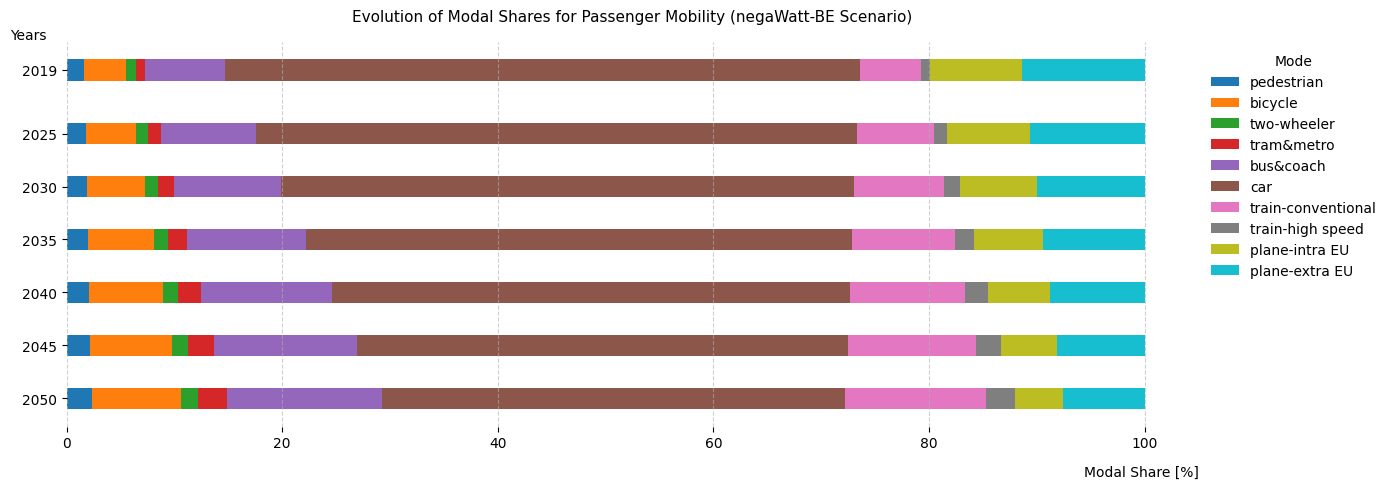

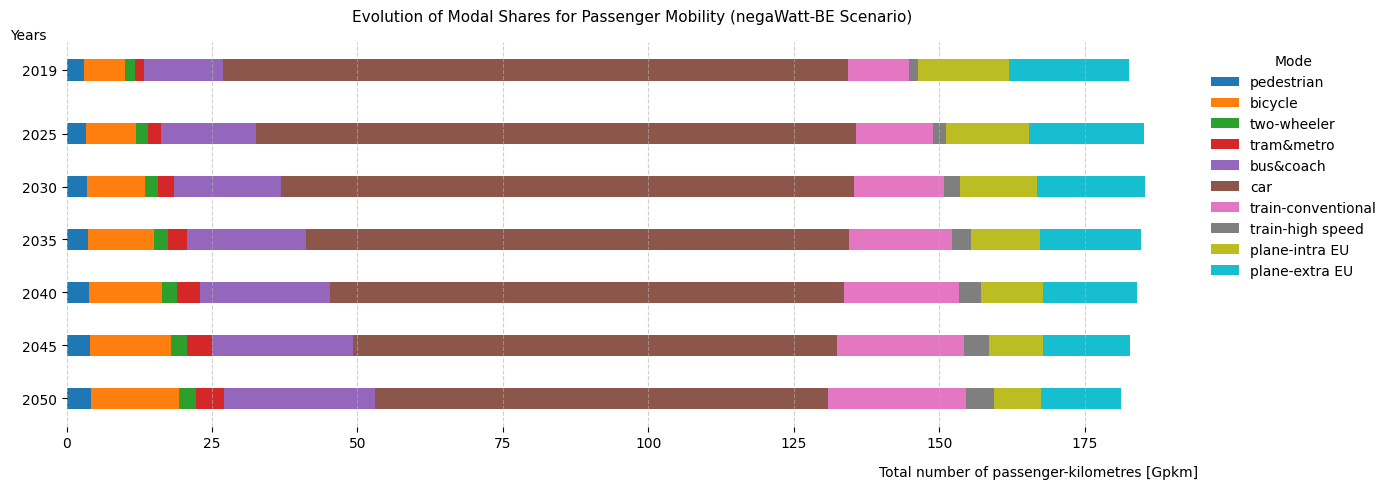

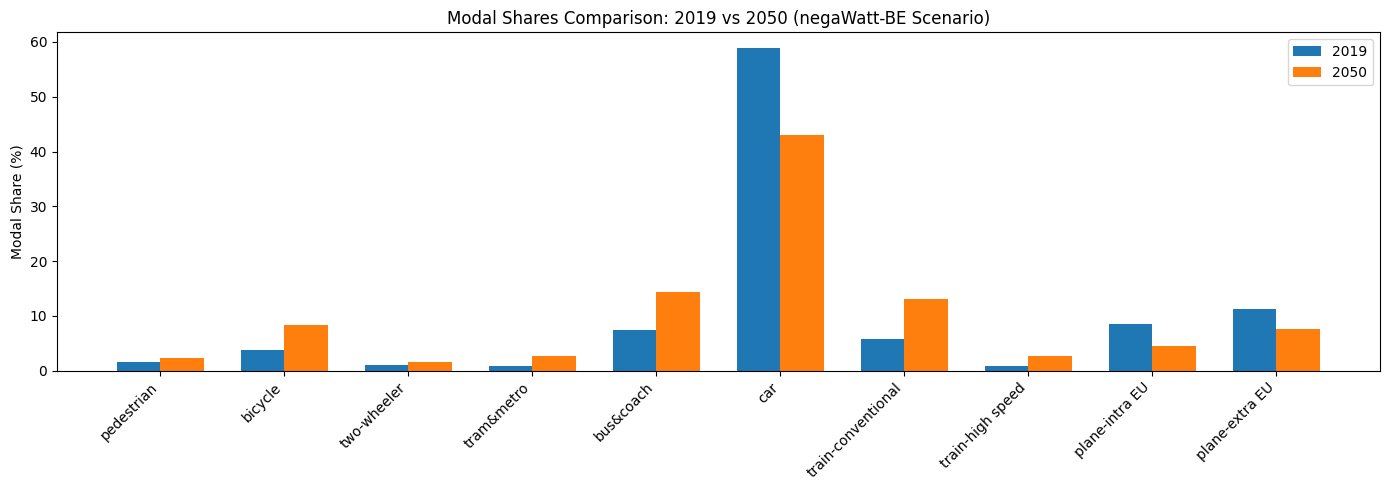

In [17]:
if post_process:
    
    # === Full table ===
    df_PM_r = df_PM.reset_index()
    total_Gpkm = df_SUF["PM total [Gpkm]"]
    total_pkmp = df_SUF["PM intensity [pkm/person]"]
    rows = []
    for unit in ['% of total', 'pkm/person', 'Gpkm']:
        if unit == '% of total':
            vals = [100] * len(years)
        elif unit == 'Gpkm':
            vals = [total_Gpkm[year] for year in years]
        else:
            vals = [total_pkmp [year] for year in years]
        rows.append(pd.DataFrame([['TOTAL', unit, *vals]], columns=df_PM_r.columns))
    df_PM_r = pd.concat([df_PM_r] + rows, ignore_index=True)
    mode_full = df_PM_r['Mode'].tolist()
    df_PM_r['Mode'] = np.where(df_PM_r['Unit'] == '% of total', df_PM_r['Mode'], '')
    styled = (
        df_PM_r.style
          .apply(highlight_lines, axis=1)
          .set_properties(subset=['Mode'], **{'font-weight':'bold'})
          .set_properties(subset=['Unit'], **{'font-style':'italic','color':'gray'})
          .format({year:"{:.2f}" for year in years})
          #.set_caption("Modal Shares")
          .hide(axis='index')
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
    )
    display(styled)
    
    # === Breakdown bar chart - relative values ===
    dfmp = df_PM_MOD.transpose()
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, mode in enumerate(dfmp.columns):
        ax.barh(dfmp.index, dfmp[mode],
                left=bottom, label=mode,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfmp[mode]
    ax.set_xlabel("Modal Share [%]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Modal Shares for Passenger Mobility (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()
    
    # === Breakdown bar chart - absolute values ===
    dfmp = df_PM.transpose()
    fig2, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    j = 0
    for i, mode in enumerate(dfmp.columns):
        if mode[1] == 'Gpkm':
            ax.barh(dfmp.index, dfmp[mode],
                    left=bottom, label=mode[0],
                    color=colors[j % len(colors)],
                    height=bar_height)
            bottom += dfmp[mode]
            j += 1
    ax.set_xlabel("Total number of passenger-kilometres [Gpkm]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Modal Shares for Passenger Mobility (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig2.tight_layout()
    plt.show()
    
    # === Breakdown bar chart - comparison of relative values in 2019 and 2050 ===
    labels = df_PM_MOD.index.tolist()
    sizes_2019 = df_PM_MOD[2019].values            # Modal shares for 2019
    sizes_2050 = df_PM_MOD[2050].values            # Modal shares for 2050
    x = np.arange(len(labels))   # x locations for each mode
    width = 0.35                 # bar width
    fig, ax = plt.subplots(figsize=(14, 5))
    # Bars for 2019 and 2050
    ax.bar(x - width/2, sizes_2019, width, label='2019')
    ax.bar(x + width/2, sizes_2050, width, label='2050')
    # Labels and Title
    ax.set_ylabel('Modal Share (%)')
    ax.set_title('Modal Shares Comparison: 2019 vs 2050 (negaWatt-BE Scenario)')
    # X-ticks: mode names, rotated for readability
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    # Legend to identify each year
    ax.legend()
    # Tight layout to avoid clipping
    plt.tight_layout()
    plt.show()

---

<font size="4"><b>2.2. Carriers Shares</b></font> <a class="anchor" id="section_2_2"></a>

---

This section presents the internal distribution of each transport mode by energy carrier and powertrain type, as a percentage of the total Gpkm for that mode. These shares are used to calculate the weighted energy demand and infrastructure needs per technology.

---

<font size="3"><b>2.2.1. Bicycle </b></font> <a class="anchor" id="section_2_2_1"></a>

---

The bicycle mode is split between human-powered (mechanical) and electric bicycles. Shares are given as a percentage of total Gpkm covered by bicycles (see Section 2.1.8.).

Few figures are available regarding the share of trips made by electric bicycles (standard e-bikes with assistance up to 25 km/h and speed pedelecs) in 2019. The 2017 survey by the Belgian Federal Public Service for Mobility and Transport indicates that electric bicycles accounted for 9,3% of all *trips* made by bicycle [3]. The 2025 survey by the Belgian Federal Public Service for Mobility and Transport, by contrast, shows that electric bicycles now account for 64% of total *kilometres travelled* by bicycle [4].
The distinction between *trips* and *kilometres travelled* is meaningful when considering the average distances covered per trip by bicycle type: 4 km for conventional bicycles, 5 km for electric bicycles, and 10 km for speed pedelecs [4].
The increased use of electric bicycles is undoubtedly linked to the continuous growth in sales up to the COVID period, followed by a sharp increase afterwards. It should nevertheless be noted that sales have since stabilised, while the share of electric bicycle sales has clearly overtaken that of conventional bicycles since 2023.

Due to the lack of more precise data, we estimate that **electric bicycles** accounted for **25%** of total **bicycle kilometres** travelled in **2019**.

<br/>
$\textcolor{Orange}{\textbf{Comfort Assumption}}$

We believe that the widespread deployment of cycling as a major mode of transport by 2050 will be enabled by the adoption of electric bicycles, as they increase user comfort and average travel speed.
Nevertheless, given the short length of many trips, the favourable geography of a large part of the country, and the use of folding bikes as multimodal tools, we consider that the share of **electric bicycles** should not exceed **80%**. We assume that this level will already be reached by **2040**.


In [18]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_bic = 25 # [%]
end_PM_bic = 80 # [%]
mid_PM_bic = 2040
# Outputs - Sufficiency Scenario Data (SUF)
carriers_PM_bic = {
    'electrical':                 linear_with_middle_point(2019, sta_PM_bic, mid_PM_bic, end_PM_bic, 2050, end_PM_bic, years), # [%]
    'mechanical': [100-x for x in linear_with_middle_point(2019, sta_PM_bic, mid_PM_bic, end_PM_bic, 2050, end_PM_bic, years)] # [%]
}
df_PM_bic = pd.DataFrame(carriers_PM_bic, index=years).T.round(3)

---

<font size="3"><b>2.2.2. Two-Wheeler</b></font> <a class="anchor" id="section_2_2_2"></a>

---

The two-wheelers mode is divided between liquid-fuel and electric two-wheelers. Shares refer to the percentage of total Gpkm covered by two-wheelers (see [Section 2.1.8.](#section_2_1_8)).

The breakdown of propulsion types for two-wheelers in 2019 is not provided by JRC-IDEES [1,2], which does not distinguish propulsion technologies for this transport mode. We assume their contribution to be low, or even negligible, and therefore set it to **0%** for **2019**.

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>

The goal is to minimise liquid fuel use as much as possible by 2050. The electrification of two-wheelers has already begun, particularly for urban models. However, full phase-out is unlikely, notably due to their use for leisure purposes. Nevertheless, fossil gasoline can gradually be replaced by bio- and e-fuels.
We project that only **15%** of kilometres travelled by two-wheelers will still be powered by **liquid fuels** (gasoline type). The **remainder** will be powered by **battery-electric** propulsion.

In [19]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_mot = 100 # [%]
end_PM_mot =  15 # [%]
# Outputs - Sufficiency Scenario Data (SUF)
carriers_PM_mot = {
    'liquid-gasoline':             linear_growth(2019, sta_PM_mot, 2050, end_PM_mot, years),  # [%]
    'electrical':  [100-x for x in linear_growth(2019, sta_PM_mot, 2050, end_PM_mot, years)], # [%]
}
df_PM_mot = pd.DataFrame(carriers_PM_mot, index=years).T.round(3)

---

<font size="3"><b>2.2.3. Metro and Tram</b></font> <a class="anchor" id="section_2_2_3"></a>

---

The metro and tram mode contains only electric vehicles. Shares refer to the percentage of total Gpkm covered by metros and trams (see [Section 2.1.8.](#section_2_1_8)).

> ***Comment:** Heavy metros are directly fed via a third rail (Brussels) and light metros (pre-metros) are directly fed via a catenary (Charleroi, Brussels, Antwerp). Trams are fed via a catenary (coastal tram, Brussels, Antwerp, Ghent, Charleroi) and hybrid catenary-battery (Liège).*

In [20]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_trm_met = 100 # [%]
end_PM_trm_met = 100 # [%]
# Outputs - Sufficiency Scenario Data (SUF)
carriers_PM_trm_met = {
    'electrical':  linear_growth(2019, sta_PM_trm_met, 2050, end_PM_trm_met, years), # [%]
}
df_PM_trm_met = pd.DataFrame(carriers_PM_trm_met, index=years).T.round(3)

---

<font size="3"><b>2.2.4. Bus and Coach</b></font> <a class="anchor" id="section_2_2_4"></a>

---

In 2019, diesel propulsion dominated buses and coaches, accounting for more than 99% of the fleet: 

* Diesel engines: 99,27% 
* Battery Electric Vehicles (BEV): 0,39% 
* Gasoline engines: 0,25% 
* Natural Gas (CNG/LNG) engines: 0,09%

The shares refer to the percentage of total Gpkm covered by buses and coaches (see Section 2.1.8.). The breakdown of propulsion types for  2019 is provided by JRC-IDEES [1,2]. 

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>

The electrification of buses and coaches is already well underway in Belgium, with their share reaching 2,21% of total passenger-kilometres in 2023 (5,71 times higher than in 2019). 
The adoption of battery electric vehicles for urban lines is progressing rapidly, with their share of sales increasing from 9% in 2019 to 78% in 2024 (see Transport & Environment, https://www.transportenvironment.org/articles/half-of-new-eu-city-buses-were-zero-emission-in-2024). A share above 90% for battery electric buses in new sales could therefore be reached quickly in Belgium (this has already been the case in Denmark since 2022 and in other EU countries). 

The figures also show an increase in the sales share of hydrogen fuel-cell buses in the EU-27 (see Solaris Urbino 18 Hydrogen), rising from 1% over the 2021–2023 period to 3% in 2024 (still 0% in Belgium at this stage). This share remains confidential but could increase for applications where range is a key issue (such as coaches) and due to logistical constraints (limited access to charging infrastructure, charging times). Several manufacturers are developing solutions in this area (see Irizar i6S Efficient Hydrogen and Daimler-Setra H2 Coach). Nevertheless, given the already high ranges exceeding 600 km offered by electric coaches (see Volvo BZR Electric and MAN Lion’s Coach E), it is also very likely that battery electric coaches will dominate over hydrogen in the future.

For our projections, we mainly rely on battery electric vehicles, which are assumed to account for 90% of the fleet by 2050. As no trolleybus projects (with or without onboard batteries) are currently being discussed in Belgium, this option is not considered. Regarding hydrogen, the outlook is highly uncertain due to competition with battery electric solutions and the difficulties in scaling up the hydrogen value chain. We nevertheless assume a 5% share by 2050. For the remaining share, we assume that gasoline-powered drivetrains will completely disappear. We also retain a small 3% share for liquid-fuel propulsion, considering that biodiesel could facilitate the use of locally produced energy while enabling longer-distance operations. Similarly, we allocate a 2% share to gas-powered vehicles, assuming the potential valorisation of biogas.orisation of biogas.

In [21]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_bus_cch_lfd   = 99.27 # [%]
end_PM_bus_cch_lfd   =  3.00 # [%]
sta_PM_bus_cch_lfg   =  0.25 # [%]
end_PM_bus_cch_lfg   =  0.00 # [%]
sta_PM_bus_cch_h2    =  0.00 # [%]
end_PM_bus_cch_h2    =  5.00 # [%]
sta_PM_bus_cch_cng   =  0.09 # [%]
end_PM_bus_cch_cng   =  2.00 # [%]
slope_f_PM_bus_cch   =  0.9
# Outputs - Sufficiency Scenario Data (SUF)
carriers_bus = {
    'liquid-diesel':    s_curve_growth(2019, sta_PM_bus_cch_lfd, 2050, end_PM_bus_cch_lfd, years, slope_f_PM_bus_cch),  # [%]
    'liquid-gasoline':  s_curve_growth(2019, sta_PM_bus_cch_lfg, 2050, end_PM_bus_cch_lfg, years, slope_f_PM_bus_cch),  # [%]
    'hydrogen':         s_curve_growth(2019, sta_PM_bus_cch_h2,  2050, end_PM_bus_cch_h2,  years, slope_f_PM_bus_cch),  # [%]
    'gas-NG':           s_curve_growth(2019, sta_PM_bus_cch_cng, 2050, end_PM_bus_cch_cng, years, slope_f_PM_bus_cch),  # [%]
    'electrical':  [100-w-x-y-z for w, x, y, z in zip(*[s_curve_growth(2019, sta_PM_bus_cch_lfd, 2050, end_PM_bus_cch_lfd, years, slope_f_PM_bus_cch),
                                                        s_curve_growth(2019, sta_PM_bus_cch_lfg, 2050, end_PM_bus_cch_lfg, years, slope_f_PM_bus_cch),
                                                        s_curve_growth(2019, sta_PM_bus_cch_h2,  2050, end_PM_bus_cch_h2,  years, slope_f_PM_bus_cch),
                                                        s_curve_growth(2019, sta_PM_bus_cch_cng, 2050, end_PM_bus_cch_cng, years, slope_f_PM_bus_cch)])], # [%]
}
df_PM_bus_cch = pd.DataFrame(carriers_bus, index=years).T.round(3)

---

<font size="3"><b>2.2.5. Passenger Car</b></font> <a class="anchor" id="section_2_2_5"></a>

---

In 2019, diesel and gasoline propulsion dominated passenger cars, accounting for more than 98% of the fleet: 

* Diesel engines: 63,25%
* Gasoline engines: 35,00%
* Liquefied Petroleum Gas (LPG) engines: 0,69%
* Plug-in Hybrid electric Vehicles (PHV): 0,53%
* Natural Gas (CNG/LNG) engines: 0,29%
* Battery Electric Vehicles: 0,24%

The shares refer to the percentage of total Gpkm covered by cars (see Section 2.1.8.). The breakdown of propulsion types for  2019 is provided by JRC-IDEES [1,2].

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>

In light of current technological developments, sales trends, and the regulations imposed by the European Commission, it appears realistic that the majority of cars sold in 2040 will be battery electric vehicles. Consequently, most of the vehicle fleet in 2050 should consist of battery-powered vehicles. We nevertheless retain a small share (1,5% each) for diesel, gasoline, and gas engines, as these could potentially be fueled with renewable fuels (biofuels, or even e-fuels). We however exclude hydrogen, as current prospects do not appear favorable for this drivetrain.

We aim for a gradual phase-out of gasoline and diesel engines, reaching a combined floor value of 3% by 2050. Given current trends, which point to a rapid decline of diesel (-3,1%/year of total shares), likely reinforced by the Dieselgate scandal, its minimum share of 1,5% should be reached by 2040. Gasoline gradually replaces diesel during the transition, although the total share of internal combustion engines continues to decline. 

For the Belgian market, we consider plug-in hybrid vehicles as transition technologies between internal combustion and electric vehicles. We expect their share to peak at around 6% by 2030.at around 6% by 2030.nd 6% by 2030.

In [22]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_car_lfd   = 63.25 # [%]
end_PM_car_lfd   =  1.50 # [%]
mid_PM_car_lfd   =  2040
sta_PM_car_lfg   = 35.00 # [%]
end_PM_car_lfg   =  1.50 # [%]
sta_PM_car_lpg   =  0.69 # [%]
end_PM_car_lpg   =  0.00 # [%]
sta_PM_car_phv   =  0.53 # [%]
end_PM_car_phv   =  0.00 # [%]
mid_PM_car_phv   =  6.00 # [%]
sta_PM_car_cng   =  0.29 # [%]
end_PM_car_cng   =  1.50 # [%]
# Outputs - Sufficiency Scenario Data (SUF)
carriers_PM_car = {
    'liquid-diesel':                 linear_with_middle_point(2019, sta_PM_car_lfd, mid_PM_car_lfd, end_PM_car_lfd, 2050, end_PM_car_lfd,                years),    # [%]
    'liquid-gasoline':  [x-y for x, y in zip(*[s_curve_growth(2019, sta_PM_car_lfd +sta_PM_car_lfg,                 2050, end_PM_car_lfd+end_PM_car_lfg, years,0.8),
                                     linear_with_middle_point(2019, sta_PM_car_lfd, mid_PM_car_lfd, end_PM_car_lfd, 2050, end_PM_car_lfd,                years)])], # [%]
    'gas-LPG':                                  linear_growth(2019, sta_PM_car_lpg,                                 2050, end_PM_car_lpg,                years),    # [%]
    'gas-NG':                                   linear_growth(2019, sta_PM_car_cng,                                 2050, end_PM_car_cng,                years),    # [%]
    'hybrid-plug-in':              b_curve_with_control_value(2019, sta_PM_car_phv, 2030, mid_PM_car_phv,           2050, end_PM_car_phv,                years,1.5),# [%]
    'electrical':  [100-w-x-y-z for w, x, y, z in zip(*[s_curve_growth(2019, sta_PM_car_lfd+sta_PM_car_lfg,         2050, end_PM_car_lfd+end_PM_car_lfg, years,slope_f_PM_bus_cch),
                                                         linear_growth(2019, sta_PM_car_lpg,                        2050, end_PM_car_lpg,                years),
                                                         linear_growth(2019, sta_PM_car_cng,                        2050, end_PM_car_cng,                years),
                                            b_curve_with_control_value(2019, sta_PM_car_phv, 2030, mid_PM_car_phv,  2050, end_PM_car_phv,                years,1.5)])], # [%]
}
df_PM_car = pd.DataFrame(carriers_PM_car, index=years).T.round(3)

---

<font size="3"><b>2.2.6. Train</b></font> <a class="anchor" id="section_2_2_6"></a>

---

The train mode is divided between liquid-fuel and electric trains. Shares refer to the percentage of total Gpkm covered by trains (see [Section 2.1.8.](#section_2_1_8)).

The breakdown of propulsion types for conventional trains in 2019 is provided by JRC-IDEES [1,2]: over the total 10,436 Gpkm achieved, 9,97826 Gpkm (**95,61%**) were done through **electric** trains while the remaining 0,457 Gpkm (**4,39%**) were covered by **diesel** trains. Note that the line between Hasselt and Mol was electrified in 2023. All high speed trains are electric.

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>

The rail operator SNCB has committed not to renewing its AR41 diesel railcars. The main barrier to fully replacing them with electric traction remains the lack of electrification of just under 10% of the network, mainly around Ghent (Eeklo–Ronse, Ghent–Geraardsbergen, Aalst–Burst) and on the Charleroi–Couvin line. Full electrification of the network appears to be the most appropriate solution for phasing out diesel, even if it is also the most costly one [8]. The limited use of battery-electric trains also appears to be an interesting option when direct electrification is not possible. The hydrogen train option is set aside due to high operational costs. In the scenarios studied by Transport & Mobility Leuven, full electrification could be achieved by 2035, provided that appropriate policies are implemented [8]. We therefore propose to set a target of **100% electrification** by **2035** (direct catenary + battery).

In [23]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_trn_cnv = 4.39 # [%]
end_PM_trn_cnv = 0.00 # [%]
mid_PM_trn_cnv = 2035 # [%]
# Outputs - Sufficiency Scenario Data (SUF)
carriers_PM_trn_cnv = {
    'liquid-diesel':               linear_with_middle_point(2019, sta_PM_trn_cnv, mid_PM_trn_cnv, end_PM_trn_cnv, 2050, end_PM_trn_cnv, years),  # [%]
    'electrical':  [100-x for x in linear_with_middle_point(2019, sta_PM_trn_cnv, mid_PM_trn_cnv, end_PM_trn_cnv, 2050, end_PM_trn_cnv, years)], # [%]
}
carriers_PM_trn_spd = {
    'electrical':  linear_growth(2019, 100, 2050, 100, years), # [%]
}
df_PM_trn_cnv = pd.DataFrame(carriers_PM_trn_cnv, index=years).T.round(3)
df_PM_trn_spd = pd.DataFrame(carriers_PM_trn_spd, index=years).T.round(3)

---

<font size="3"><b>2.2.7. Aviation</b></font> <a class="anchor" id="section_2_2_7"></a>

---

Compared with other transport modes, the options and potential for defossilising aviation are currently far less mature and all the more uncertain. While Sustainable Aviation Fuels (SAF)-which are renewable (bio-based and synthetic) drop-in substitutes for conventional jet fuel-appear to be the most straightforward option, their real global potential remains uncertain, notably due to competing uses (land use, biomass availability).

The use of e-fuels, such as hydrogen- or ammonia-powered aircraft, is also being considered. These options nevertheless represent a considerable technical challenge, both in terms of adapting propulsion systems and in terms of fuel storage capacity and safety (energy density, flammability risks, toxicity, pollution managemec.), as well as the required adaptation of airport infrastructure. Although the aviation sector has stated its ambition to achieve carbon neutrality by 2050, projects involving alternative propulsion aircraft are facing delays. For example, Airbus’s ZEROe project, which aimed to bring short-haul a hydrogen-powered aircraft with a capacity of 100 passengers and a range  1,850 km into service by 2035, has recently been postponed by 5 to 10 years, and its budget has been reduced.

Finally, battery-electric aircraft do not appear to be a viable option for defossilising the aviation sector. Ongoing projects rather focus on developing new uses, particularly in and around urban cent

In its *Commitment to Fly Net Zero by 2050*, the International Air Transport Association (IATA) states that around 65% of GHG reductions would be achieved through SAF, 13% through electric and hydrogen aircraft, 19% through carbon capture, and 3% through operational efficiency improvements. These 13% attributed to new aircraft technologies therefore represent only a limited contribution, which likely also reflects a lack of confidence in their large-scale deployment.

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>

For our scenario, in view of the delays affecting the hydrogen aviation sector, we assume that by 2050 only, **5% of intra-European flights** will be powered by **hydrogen** (representing less than 2% of total flights). The remaining flights are assumed to rely on **liquid fuels** such as kerosene, without requiring significant changes to propulsion systems. The PyPSA model will then autonomously determine the decarbonisation strategy (use of SAF, carbon capture).
 carbon cap)tes.
es.


In [24]:
# Inputs - Define Sufficiency Scenario Data (SUF)
sta_PM_avi_srt  = 0 # [%]
end_PM_avi_srt  = 5 # [%]
mid_PM_avi_srt  = 2045
# Outputs - Sufficiency Scenario Data (SUF)
carriers_PM_avi_srt = {
    'hydrogen':                         linear_with_middle_point(2019, sta_PM_avi_srt, mid_PM_avi_srt, sta_PM_avi_srt, 2050, end_PM_avi_srt, years),  # [%]
    'liquid-kerosene':  [100-x for x in linear_with_middle_point(2019, sta_PM_avi_srt, mid_PM_avi_srt, sta_PM_avi_srt, 2050, end_PM_avi_srt, years)], # [%]
}
carriers_PM_avi_lng = {
    'liquid-kerosene':  linear_growth(2019, 100, 2050, 100, years), # [%]
}
df_PM_avi_srt = pd.DataFrame(carriers_PM_avi_srt, index=years).T.round(3)
df_PM_avi_lng = pd.DataFrame(carriers_PM_avi_lng, index=years).T.round(3)


---

<font size="3"><b>2.2.8. Global data processing</b></font> <a class="anchor" id="section_2_2_8"></a>

---


In [25]:
# Processing - Carriers Shares (in %)
df_PM_ped = pd.DataFrame({'human': [100] * len(years)}, index=years).T
df_PM_carriers = {
    'pedestrian':         df_PM_ped,
    'bicycle':            df_PM_bic,
    'two-wheeler':        df_PM_mot,
    'tram&metro':         df_PM_trm_met,
    'bus&coach':          df_PM_bus_cch,
    'car':                df_PM_car,
    'train-conventional': df_PM_trn_cnv,
    'train-high speed':   df_PM_trn_spd,
    'plane-intra EU':     df_PM_avi_srt,
    'plane-extra EU':     df_PM_avi_lng,
}
rows = []
for mode, df in df_PM_carriers.items():
    temp = df.copy()
    temp['Mode'] = mode
    temp['Powertrain'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_PM_carrier = pd.concat(rows, ignore_index=True)

In [26]:
if post_process:
    df_carrier = df_PM_carrier.copy()
    df_carrier['Mode'] = df_carrier['Mode'].mask(df_carrier['Mode'].duplicated(), '')
    df_carrier_r = df_carrier[['Mode', 'Powertrain'] + list(years)]
    styled = (
        df_carrier_r.style
          .hide(axis='index')
          #.set_caption("Carrier Shares (%)")
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
          .apply(highlight_mode_separator, axis=1)
          .apply(lambda row: [bold_mode(cell, row['Mode'], col) for col, cell in zip(df_carrier_r.columns, row)], axis=1)
          .set_properties(subset=['Powertrain'], **{'font-style':'italic'})
          .format({year: "{:.2f}%" for year in years})
    )
    display(styled)

Mode,Powertrain,2019,2025,2030,2035,2040,2045,2050
pedestrian,human,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
bicycle,electrical,25.00%,40.71%,53.81%,66.91%,80.00%,80.00%,80.00%
,mechanical,75.00%,59.29%,46.19%,33.09%,20.00%,20.00%,20.00%
two-wheeler,liquid-gasoline,100.00%,83.55%,69.84%,56.13%,42.42%,28.71%,15.00%
,electrical,0.00%,16.45%,30.16%,43.87%,57.58%,71.29%,85.00%
tram&metro,electrical,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
bus&coach,liquid-diesel,99.27%,94.48%,79.38%,47.57%,18.50%,6.38%,3.00%
,liquid-gasoline,0.25%,0.24%,0.20%,0.12%,0.04%,0.01%,0.00%
,hydrogen,0.00%,0.25%,1.03%,2.69%,4.20%,4.83%,5.00%
,gas-NG,0.09%,0.18%,0.48%,1.12%,1.69%,1.93%,2.00%


---

<font size="4"><b>2.3. Final Energy Consumption</b></font> <a class="anchor" id="section_2_3"></a>

---

In this section, the Gpkm associated with each powertrain and fuel are converted into equivalent TWh.
> ***Comment:** The modelling assumptions still need to be specified!.*


---

<font size="3"><b>2.3.1. Bicycle</b></font> <a class="anchor" id="section_2_3_1"></a>

---
The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].


In [42]:
# ===== Bicycle =====
# -> Projections of efficiency and occupancy
cons_fuel_PM_bic = pd.DataFrame({
    'electrical':  linear_growth(2019, 1.00/100, 2050, 1.00/100, years),  # [kWh/km] -> sta = https://ecoquery.ecoinvent.org/3.11/cutoff/dataset/7742/documentation, end = nW-BE
    'mechanical':  linear_growth(2019, 0.00/100, 2050, 0.00/100, years),  # [kWh/km] -> sta = nW-BE
}, index=years).T
occupancy_PM_bic = pd.DataFrame({
    'electrical':  linear_growth(2019, 1,        2050, 1,        years),  # [p] -> sta = nW-BE, end = nW-BE
    'mechanical':  linear_growth(2019, 1,        2050, 1,        years),  # [p] -> sta = nW-BE, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_bic_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'bicycle'].copy()
df_PM_bic_TWh[years] *= df_PM_GPKM.loc['bicycle', years].values/100 # Gpkm
df_PM_bic_TWh = df_PM_bic_TWh.set_index('Powertrain') # Gpkm
df_PM_bic_TWh[years] *= cons_fuel_PM_bic[years]/occupancy_PM_bic[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_bic_TWh)
df_PM_bic_TWh.loc[new_index, years] = df_PM_bic_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_bic_TWh.columns: df_PM_bic_TWh = df_PM_bic_TWh.reset_index()
df_PM_bic_TWh = df_PM_bic_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_bic_TWh.index[-1]
df_PM_bic_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_bic_TWh.loc[last_row_index, 'Mode'] = 'bicycle'
df_PM_bic_TWh = df_PM_bic_TWh[['Mode','Powertrain'] + years]
df_PM_bic_TWh = df_PM_bic_TWh.round(3)

---

<font size="3"><b>2.3.2. Two-wheeler</b></font> <a class="anchor" id="section_2_3_2"></a>

---

The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].

In [43]:
# ===== Two-wheeler =====
# -> Settings
redu_fuel_PM_mot = 0.95
# -> Projections of efficiency and occupancy
cons_fuel_PM_mot = pd.DataFrame({
    'liquid-gasoline': linear_growth(2019, 3.52/100*kgoe_to_kWh, 2050, 3.52/100*kgoe_to_kWh*redu_fuel_PM_mot, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 6.00/100,             2050, 6.00/100,                            years),  # [kWh/km] -> sta = 10.1088/1757-899X/1306/1/012032, end = nW-BE
}, index=years).T
occupancy_PM_mot = pd.DataFrame({
    'liquid-gasoline': linear_growth(2019, 1.151, 2050, 1.151, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 1.151, 2050, 1.151, years),  # [p] -> sta = nW-BE, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_mot_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'two-wheeler'].copy()
df_PM_mot_TWh[years] *= df_PM_GPKM.loc['two-wheeler', years].values/100 # Gpkm
df_PM_mot_TWh = df_PM_mot_TWh.set_index('Powertrain') # Gpkm
df_PM_mot_TWh[years] *= cons_fuel_PM_mot[years]/occupancy_PM_mot[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_mot_TWh)
df_PM_mot_TWh.loc[new_index, years] = df_PM_mot_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_mot_TWh.columns: df_PM_mot_TWh = df_PM_mot_TWh.reset_index()
df_PM_mot_TWh = df_PM_mot_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_mot_TWh.index[-1]
df_PM_mot_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_mot_TWh.loc[last_row_index, 'Mode'] = 'two-wheeler'
df_PM_mot_TWh = df_PM_mot_TWh[['Mode','Powertrain'] + years]
df_PM_mot_TWh = df_PM_mot_TWh.round(3)

---

<font size="3"><b>2.3.3. Tram and Metro</b></font> <a class="anchor" id="section_2_3_3"></a>

---

The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].

In [44]:
# ===== Tram and metro =====
# -> Settings
redu_fuel_PM_trm_met = 0.95
occu_trgt_PM_trm_met = 1.20
# -> Projections of efficiency and occupancy
cons_fuel_PM_trm_met = pd.DataFrame({
    'electrical':      linear_growth(2019, 39.141/100*kgoe_to_kWh, 2050, 39.141/100*kgoe_to_kWh*redu_fuel_PM_trm_met, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
occupancy_PM_trm_met = pd.DataFrame({
    'electrical':      linear_growth(2019, 81.938,                 2050,                 81.938*occu_trgt_PM_trm_met, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_trm_met_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'tram&metro'].copy()
df_PM_trm_met_TWh[years] *= df_PM_GPKM.loc['tram&metro', years].values/100 # Gpkm
df_PM_trm_met_TWh = df_PM_trm_met_TWh.set_index('Powertrain') # Gpkm
df_PM_trm_met_TWh[years] *= cons_fuel_PM_trm_met[years]/occupancy_PM_trm_met[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_trm_met_TWh)
df_PM_trm_met_TWh.loc[new_index, years] = df_PM_trm_met_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_trm_met_TWh.columns: df_PM_trm_met_TWh = df_PM_trm_met_TWh.reset_index()
df_PM_trm_met_TWh = df_PM_trm_met_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_trm_met_TWh.index[-1]
df_PM_trm_met_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_trm_met_TWh.loc[last_row_index, 'Mode'] = 'tram&metro'
df_PM_trm_met_TWh = df_PM_trm_met_TWh[['Mode','Powertrain'] + years]
df_PM_trm_met_TWh = df_PM_trm_met_TWh.round(3)

---

<font size="3"><b>2.3.4. Bus and Coach</b></font> <a class="anchor" id="section_2_3_4"></a>

---

The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].

> ***Comment:** The electricity consumption for BEV seems really high. In passenger cars, the ratio between diesel and electrical is about 3. For JRC-IDEES data, this is only 2.3. For electrical buses, studies report values of about 1-2 kWh/km (https://doi.org/10.1016/j.treng.2023.100223). We therefore select 2 kWh/km, instead of the 3.06 kWh/km reported by JRC-IDEES.* 


In [45]:
# ===== Bus and coach =====
# -> Settings
redu_fuel_PM_bus_cch = 0.95
occu_trgt_PM_bus_cch = 1.20
# -> Projections of efficiency and occupancy
cons_fuel_PM_bus_cch = pd.DataFrame({
    'liquid-diesel':   linear_growth(2019, 59.773/100*kgoe_to_kWh, 2050, 59.773/100*kgoe_to_kWh*redu_fuel_PM_bus_cch, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'liquid-gasoline': linear_growth(2019, 18.065/100*kgoe_to_kWh, 2050, 18.065/100*kgoe_to_kWh*redu_fuel_PM_bus_cch, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'hydrogen':        linear_growth(2019,  8.000/100*kgh2_to_kWh, 2050,  8.000/100*kgh2_to_kWh*redu_fuel_PM_bus_cch, years),  # [kWh/km] -> sta = https://doi.org/10.1016/j.ijhydene.2024.11.460, end = nW-BE
    'gas-NG':          linear_growth(2019, 64.939/100*kgoe_to_kWh, 2050, 64.939/100*kgoe_to_kWh*redu_fuel_PM_bus_cch, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
   #'electrical':      linear_growth(2019, 26.331/100*kgoe_to_kWh, 2050, 26.331/100*kgoe_to_kWh*redu_fuel_PM_bus_cch, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019,  2.0,                   2050,  2.0                  *redu_fuel_PM_bus_cch, years),  # [kWh/km] -> sta = https://doi.org/10.1016/j.treng.2023.100223, end = nW-BE
}, index=years).T
# Solaris Urbino 18 Hydrogen (city bus): 8.53kg/100km (51.2kg/600km, total tanks are 2.142m³​, 51.2kg at 350 bar and 15°C)
# Irizar i6S Efficient Hydrogen (coach):  NA kg/100km (NA kg/1000km)
# Daimler-Setra H2 Coach (coach):        5.75kg/100km (46.0kg/800km, total tanks are m³​, 46.0kg at  bar and °C)
occupancy_PM_bus_cch = pd.DataFrame({
    'liquid-diesel':   linear_growth(2019, 21.845, 2050, 21.845*occu_trgt_PM_bus_cch, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'liquid-gasoline': linear_growth(2019,  8.369, 2050,  8.369*occu_trgt_PM_bus_cch, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'hydrogen':        linear_growth(2019, 21.845, 2050, 21.845*occu_trgt_PM_bus_cch, years),  # [p] -> sta = nW-BE,     end = nW-BE
    'gas-NG':          linear_growth(2019, 21.845, 2050, 21.845*occu_trgt_PM_bus_cch, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 21.845, 2050, 21.845*occu_trgt_PM_bus_cch, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_bus_cch_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'bus&coach'].copy()
df_PM_bus_cch_TWh[years] *= df_PM_GPKM.loc['bus&coach', years].values/100 # Gpkm
df_PM_bus_cch_TWh = df_PM_bus_cch_TWh.set_index('Powertrain') # Gpkm
df_PM_bus_cch_TWh[years] *= cons_fuel_PM_bus_cch[years]/occupancy_PM_bus_cch[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_bus_cch_TWh)
df_PM_bus_cch_TWh.loc[new_index, years] = df_PM_bus_cch_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_bus_cch_TWh.columns: df_PM_bus_cch_TWh = df_PM_bus_cch_TWh.reset_index()
df_PM_bus_cch_TWh = df_PM_bus_cch_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_bus_cch_TWh.index[-1]
df_PM_bus_cch_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_bus_cch_TWh.loc[last_row_index, 'Mode'] = 'bus&coach'
df_PM_bus_cch_TWh = df_PM_bus_cch_TWh[['Mode','Powertrain'] + years]
df_PM_bus_cch_TWh = df_PM_bus_cch_TWh.round(3)

---

<font size="3"><b>2.3.5. Passenger Car</b></font> <a class="anchor" id="section_2_3_5"></a>

---

The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].

Accoring to JRC-IDEES [1,2], the share of electricity as a primary energy source in plug-in hybrid vehicles increased from around 40% in 2012 to nearly 60% in 2023. In this work, we therefore assume a 50/50 split to convert energy consumption into equivalent amounts of gasoline and electricity.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency and Efficiency Assumptions}}$

Overal, -25% fuel consumption thanks to:
* reduced speed limit and eco-driving behavior: reduce aero drag, mass of cars (safety)
* smaller cars: reduce aero drag, mass of cars
* more efficient power trains (including regenerative braking for electric cars, non-plug-in hybrid for thermal)

> ***Comment:** Although these improvements implicitly account for the effects of reduced speed and vehicle weight, they are not modelled separately. Future work could aim to link these effects more transparently to this parameter.*

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

Occupancy from about 1,2 to 2,0 thanks to carpooling.


In [47]:
# ===== Passenger Car =====
# -> Settings
share_elec_plug_in = 0.50
redu_fuel_PM_car = 0.75
occu_trgt_PM_car = 2.0
# -> Projections of efficiency and occupancy
cons_fuel_PM_car = pd.DataFrame({
    'liquid-diesel':   linear_growth(2019, 5.523/100*kgoe_to_kWh, 2050, 5.523/100*kgoe_to_kWh*redu_fuel_PM_car, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'liquid-gasoline': linear_growth(2019, 5.798/100*kgoe_to_kWh, 2050, 5.798/100*kgoe_to_kWh*redu_fuel_PM_car, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'gas-LPG':         linear_growth(2019, 7.477/100*kgoe_to_kWh, 2050, 7.477/100*kgoe_to_kWh*redu_fuel_PM_car, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'gas-NG':          linear_growth(2019, 9.107/100*kgoe_to_kWh, 2050, 9.107/100*kgoe_to_kWh*redu_fuel_PM_car, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'hybrid-plug-in':  linear_growth(2019, 3.735/100*kgoe_to_kWh, 2050, 3.735/100*kgoe_to_kWh*redu_fuel_PM_car, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 1.818/100*kgoe_to_kWh, 2050, 1.818/100*kgoe_to_kWh*redu_fuel_PM_car, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
occupancy_PM_car = pd.DataFrame({
    'liquid-diesel':   linear_growth(2019, 1.242, 2050, occu_trgt_PM_car, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'liquid-gasoline': linear_growth(2019, 1.188, 2050, occu_trgt_PM_car, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'gas-LPG':         linear_growth(2019, 1.184, 2050, occu_trgt_PM_car, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'gas-NG':          linear_growth(2019, 1.184, 2050, occu_trgt_PM_car, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'hybrid-plug-in':  linear_growth(2019, 1.194, 2050, occu_trgt_PM_car, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 1.099, 2050, occu_trgt_PM_car, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_car_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'car'].copy()
df_PM_car_TWh[years] *= df_PM_GPKM.loc['car', years].values/100 # Gpkm
df_PM_car_TWh = df_PM_car_TWh.set_index('Powertrain') # Gpkm
df_PM_car_TWh[years] *= cons_fuel_PM_car[years]/occupancy_PM_car[years] # TWh
# -> Disaggregate hybrid plug-in
df_PM_car_TWh.loc['electrical',      years] += df_PM_car_TWh.loc['hybrid-plug-in', years] *    share_elec_plug_in
df_PM_car_TWh.loc['liquid-gasoline', years] += df_PM_car_TWh.loc['hybrid-plug-in', years] * (1-share_elec_plug_in)
df_PM_car_TWh = df_PM_car_TWh.drop('hybrid-plug-in')
# -> Make total for sanity check
new_index = len(df_PM_car_TWh)
df_PM_car_TWh.loc[new_index, years] = df_PM_car_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_car_TWh.columns: df_PM_car_TWh = df_PM_car_TWh.reset_index()
df_PM_car_TWh = df_PM_car_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_car_TWh.index[-1]
df_PM_car_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_car_TWh.loc[last_row_index, 'Mode'] = 'car'
df_PM_car_TWh = df_PM_car_TWh[['Mode','Powertrain'] + years]
df_PM_car_TWh = df_PM_car_TWh.round(3)

---

<font size="3"><b>2.3.6. Train</b></font> <a class="anchor" id="section_2_3_6"></a>

---

The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].

In [53]:
# ===== Train (conventional) =====
# -> Settings
redu_fuel_PM_trn_cnv = 0.90
occu_trgt_PM_trn_cnv = 1.20
# -> Projections of efficiency and occupancy
cons_fuel_PM_trn_cnv = pd.DataFrame({
    'liquid-diesel':   linear_growth(2019, 201.155/100*kgoe_to_kWh, 2050, 201.155/100*kgoe_to_kWh,                     years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 115.233/100*kgoe_to_kWh, 2050, 115.233/100*kgoe_to_kWh*redu_fuel_PM_trn_cnv, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
occupancy_PM_trn_cnv = pd.DataFrame({
    'liquid-diesel':   linear_growth(2019,  82.898,                 2050,                  82.898*occu_trgt_PM_trn_cnv, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
    'electrical':      linear_growth(2019, 131.549,                 2050,                 131.549*occu_trgt_PM_trn_cnv, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_trn_cnv_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'train-conventional'].copy()
df_PM_trn_cnv_TWh[years] *= df_PM_GPKM.loc['train-conventional', years].values/100 # Gpkm
df_PM_trn_cnv_TWh = df_PM_trn_cnv_TWh.set_index('Powertrain') # Gpkm
df_PM_trn_cnv_TWh[years] *= cons_fuel_PM_trn_cnv[years]/occupancy_PM_trn_cnv[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_trn_cnv_TWh)
df_PM_trn_cnv_TWh.loc[new_index, years] = df_PM_trn_cnv_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_trn_cnv_TWh.columns: df_PM_trn_cnv_TWh = df_PM_trn_cnv_TWh.reset_index()
df_PM_trn_cnv_TWh = df_PM_trn_cnv_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_trn_cnv_TWh.index[-1]
df_PM_trn_cnv_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_trn_cnv_TWh.loc[last_row_index, 'Mode'] = 'train-conventional'
df_PM_trn_cnv_TWh = df_PM_trn_cnv_TWh[['Mode','Powertrain'] + years]
df_PM_trn_cnv_TWh = df_PM_trn_cnv_TWh.round(3)

In [54]:
# ===== Train (high speed) =====
# -> Settings
redu_fuel_PM_trn_spd = 0.90
occu_trgt_PM_trn_spd = 1.05
# -> Projections of efficiency and occupancy
cons_fuel_PM_trn_spd = pd.DataFrame({
    'electrical':      linear_growth(2019, 213.694/100*kgoe_to_kWh, 2050, 213.694/100*kgoe_to_kWh*redu_fuel_PM_trn_spd, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
occupancy_PM_trn_spd = pd.DataFrame({
    'electrical':      linear_growth(2019, 302.477,                 2050,                 302.477*occu_trgt_PM_trn_spd, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_trn_spd_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'train-high speed'].copy()
df_PM_trn_spd_TWh[years] *= df_PM_GPKM.loc['train-high speed', years].values/100 # Gpkm
df_PM_trn_spd_TWh = df_PM_trn_spd_TWh.set_index('Powertrain') # Gpkm
df_PM_trn_spd_TWh[years] *= cons_fuel_PM_trn_spd[years]/occupancy_PM_trn_spd[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_trn_spd_TWh)
df_PM_trn_spd_TWh.loc[new_index, years] = df_PM_trn_spd_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_trn_spd_TWh.columns: df_PM_trn_spd_TWh = df_PM_trn_spd_TWh.reset_index()
df_PM_trn_spd_TWh = df_PM_trn_spd_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_trn_spd_TWh.index[-1]
df_PM_trn_spd_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_trn_spd_TWh.loc[last_row_index, 'Mode'] = 'train-high speed'
df_PM_trn_spd_TWh = df_PM_trn_spd_TWh[['Mode','Powertrain'] + years]
df_PM_trn_spd_TWh = df_PM_trn_spd_TWh.round(3)

---

<font size="3"><b>2.3.7. Aviation</b></font> <a class="anchor" id="section_2_3_7"></a>

---

The specific fuel consumption [kWh/km] for each propulsion type for 2019 is provided by JRC-IDEES [1,2].
The occucpancy ratio is defined as the ratio between the specific fuel consumption [kWh/km] and the activity energy intensity [kWh/pkm].

In [56]:
# ===== Aviation (intra EU) =====
# -> Settings
redu_fuel_PM_avi_intra = 1.05 # + 9.4% from 2000 to 2023 (from 578.8 kgoe/100km to 633.0 kgoe/100km)
occu_trgt_PM_avi_intra = 1.25 # +49.5% from 2000 to 2023 (from 87.5p to 130.8p)
# -> Projections of efficiency and occupancy
cons_fuel_PM_avi_intra = pd.DataFrame({
    'hydrogen':        linear_growth(2019, 130.000/100*kgh2_to_kWh, 2050, 130.000/100*kgh2_to_kWh,                       years),  # [kWh/km] -> sta = Airbus Zero-E, end = nW-BE
    'liquid-kerosene': linear_growth(2019, 593.771/100*kgoe_to_kWh, 2050, 593.771/100*kgoe_to_kWh*redu_fuel_PM_avi_intra, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
occupancy_PM_avi_intra = pd.DataFrame({
    'hydrogen':        linear_growth(2019, 100.000,                 2050,                 100.000,                       years),  # [p] -> sta = Airbus Zero-E, end = nW-BE
    'liquid-kerosene': linear_growth(2019, 121.927,                 2050,                 121.927*occu_trgt_PM_avi_intra, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_avi_srt_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'plane-intra EU'].copy()
df_PM_avi_srt_TWh[years] *= df_PM_GPKM.loc['plane-intra EU', years].values/100 # Gpkm
df_PM_avi_srt_TWh = df_PM_avi_srt_TWh.set_index('Powertrain') # Gpkm
df_PM_avi_srt_TWh[years] *= cons_fuel_PM_avi_intra[years]/occupancy_PM_avi_intra[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_avi_srt_TWh)
df_PM_avi_srt_TWh.loc[new_index, years] = df_PM_avi_srt_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_avi_srt_TWh.columns: df_PM_avi_srt_TWh = df_PM_avi_srt_TWh.reset_index()
df_PM_avi_srt_TWh = df_PM_avi_srt_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_avi_srt_TWh.index[-1]
df_PM_avi_srt_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_avi_srt_TWh.loc[last_row_index, 'Mode'] = 'plane-intra EU'
df_PM_avi_srt_TWh = df_PM_avi_srt_TWh[['Mode','Powertrain'] + years]
df_PM_avi_srt_TWh = df_PM_avi_srt_TWh.round(3)

In [57]:
# ===== Aviation (extra EU) =====
# -> Settings
redu_fuel_PM_avi_extra = 0.84 # -32.8% from 2000 to 2023 (from 937.0 kgoe/100km to 629.5 kgoe/100km)
occu_trgt_PM_avi_extra = 1.17 # +33.7% from 2000 to 2023 (from 154.0p to 205.5p)
# -> Projections of efficiency and occupancy
cons_fuel_PM_avi_extra = pd.DataFrame({
    'liquid-kerosene': linear_growth(2019, 578.489/100*kgoe_to_kWh, 2050, 578.489/100*kgoe_to_kWh*redu_fuel_PM_avi_extra, years),  # [kWh/km] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
occupancy_PM_avi_extra = pd.DataFrame({
    'liquid-kerosene': linear_growth(2019, 187.817,                 2050,                 187.817*occu_trgt_PM_avi_extra, years),  # [p] -> sta = JRC-IDEES, end = nW-BE
}, index=years).T
# -> Conversion to TWh
df_PM_avi_lng_TWh = df_PM_carrier[df_PM_carrier['Mode'] == 'plane-extra EU'].copy()
df_PM_avi_lng_TWh[years] *= df_PM_GPKM.loc['plane-extra EU', years].values/100 # Gpkm
df_PM_avi_lng_TWh = df_PM_avi_lng_TWh.set_index('Powertrain') # Gpkm
df_PM_avi_lng_TWh[years] *= cons_fuel_PM_avi_extra[years]/occupancy_PM_avi_extra[years] # TWh
# -> Make total for sanity check
new_index = len(df_PM_avi_lng_TWh)
df_PM_avi_lng_TWh.loc[new_index, years] = df_PM_avi_lng_TWh[years].sum()
# -> Clean and process
if 'Powertrain' not in df_PM_avi_lng_TWh.columns: df_PM_avi_lng_TWh = df_PM_avi_lng_TWh.reset_index()
df_PM_avi_lng_TWh = df_PM_avi_lng_TWh.rename(columns={'index': 'Powertrain'})
last_row_index = df_PM_avi_lng_TWh.index[-1]
df_PM_avi_lng_TWh.loc[last_row_index, 'Powertrain'] = 'TOTAL'
df_PM_avi_lng_TWh.loc[last_row_index, 'Mode'] = 'plane-extra EU'
df_PM_avi_lng_TWh = df_PM_avi_lng_TWh[['Mode','Powertrain'] + years]
df_PM_avi_lng_TWh = df_PM_avi_lng_TWh.round(3)


---

<font size="3"><b>2.3.8. Global data processing</b></font> <a class="anchor" id="section_2_3_8"></a>

---


In [58]:
df_PM_TWh_lst = [df_PM_bic_TWh, 
                 df_PM_mot_TWh, 
                 df_PM_trm_met_TWh, 
                 df_PM_bus_cch_TWh, 
                 df_PM_car_TWh, 
                 df_PM_trn_cnv_TWh, 
                 df_PM_trn_spd_TWh, 
                 df_PM_avi_srt_TWh, 
                 df_PM_avi_lng_TWh
]
df_PM_TWh_all = pd.concat(df_PM_TWh_lst, ignore_index=True)
df_PM_TWh_flt = df_PM_TWh_all[~df_PM_TWh_all['Powertrain'].isin(['TOTAL', 'mechanical'])].copy()
df_PM_TWh_agr = df_PM_TWh_flt.groupby('Powertrain').sum(numeric_only=True)
custom_order = [
    'electrical', 
    'liquid-gasoline', 
    'liquid-diesel', 
    'liquid-kerosene', 
    'gas-NG', 
    'gas-LPG', 
    'hydrogen'
]
df_PM_TWh_agr = df_PM_TWh_agr.reindex(custom_order)

Mode,Powertrain,2019,2025,2030,2035,2040,2045,2050
bicycle,electrical,0.017 TWh,0.035 TWh,0.054 TWh,0.076 TWh,0.101 TWh,0.111 TWh,0.120 TWh
,mechanical,0.000 TWh,0.000 TWh,0.000 TWh,0.000 TWh,0.000 TWh,0.000 TWh,0.000 TWh
,TOTAL,0.017 TWh,0.035 TWh,0.054 TWh,0.076 TWh,0.101 TWh,0.111 TWh,0.120 TWh
two-wheeler,liquid-gasoline,0.622 TWh,0.591 TWh,0.538 TWh,0.466 TWh,0.376 TWh,0.270 TWh,0.148 TWh
,electrical,0.000 TWh,0.017 TWh,0.035 TWh,0.055 TWh,0.077 TWh,0.102 TWh,0.130 TWh
,TOTAL,0.622 TWh,0.608 TWh,0.573 TWh,0.521 TWh,0.454 TWh,0.372 TWh,0.278 TWh
tram&metro,electrical,0.082 TWh,0.115 TWh,0.139 TWh,0.161 TWh,0.180 TWh,0.198 TWh,0.214 TWh
,TOTAL,0.082 TWh,0.115 TWh,0.139 TWh,0.161 TWh,0.180 TWh,0.198 TWh,0.214 TWh
bus&coach,liquid-diesel,4.322 TWh,4.684 TWh,4.266 TWh,2.728 TWh,1.120 TWh,0.404 TWh,0.197 TWh
,liquid-gasoline,0.009 TWh,0.009 TWh,0.008 TWh,0.005 TWh,0.002 TWh,0.000 TWh,0.000 TWh


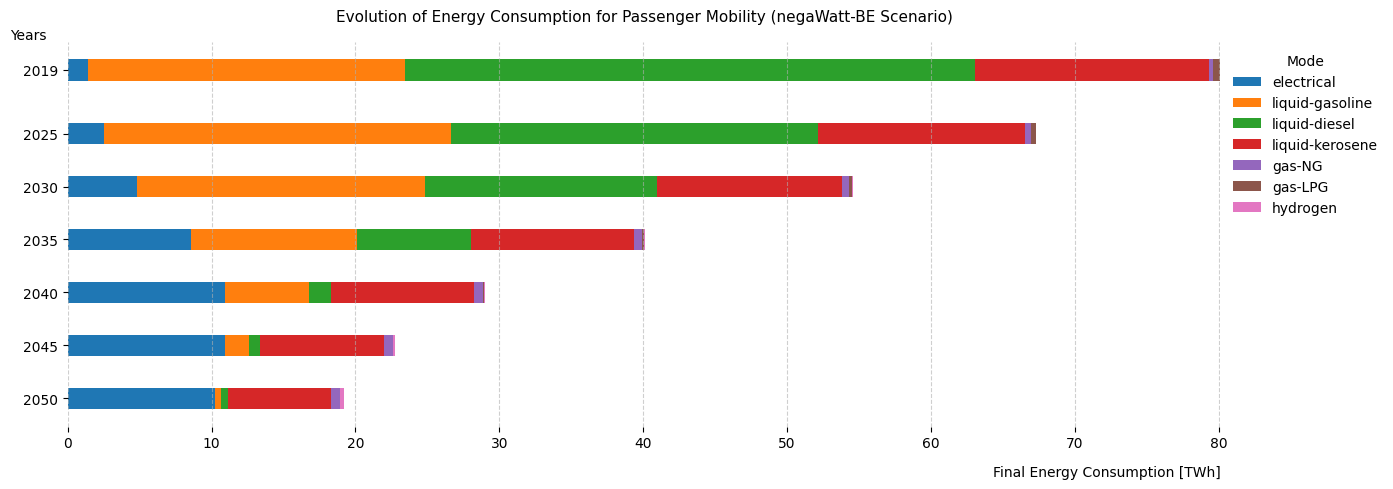

In [59]:
if post_process:

    # === Full table ===
    df_fec = df_PM_TWh_all
    df_fec['Mode'] = df_fec['Mode'].mask(df_fec['Mode'].duplicated(), '')
    df_fec_r = df_fec[['Mode', 'Powertrain'] + list(years)]
    styled = (
        df_fec_r.style
          .hide(axis='index')
          #.set_caption("Carrier Shares (%)")
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
          .apply(highlight_mode_separator, axis=1)
          .apply(lambda row: [bold_mode(cell, row['Mode'], col) for col, cell in zip(df_fec_r.columns, row)], axis=1)
          .set_properties(subset=['Powertrain'], **{'font-style':'italic'})
          .format({year: "{:.3f} TWh" for year in years})
    )
    display(styled)
    
    # === Breakdown bar chart - absolute values ===
    dfmp = df_aggregated.transpose()
    fig, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    j = 0
    for i, fuel in enumerate(dfmp.columns):
        ax.barh(dfmp.index, dfmp[fuel],
                left=bottom, label=fuel,
                color=colors[j % len(colors)],
                height=bar_height)
        bottom += dfmp[fuel]
        j += 1
    ax.set_xlabel("Final Energy Consumption [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Energy Consumption for Passenger Mobility (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig.tight_layout()
    plt.show()



---

<font size="5"><b>3. Freight Transport</b></font> <a class="anchor" id="section_3"></a>


---

This section defines the modal shares (type of transport mode) and carrier shares (type of powertrain) to allocate the total land-based and air-based ton-kilometers across the different transport modes and transport carriers. 

---

<font size="4"><b>3.1. Modal Shares</b></font> <a class="anchor" id="section_3_1">
<This section defines the modal shares, which are expressed in percentages of total ton-kilometers. Air transport is included, while maritime transport is addressed in a separate section.

The modal shares for the reference year (2019) are based on JRC-IDEES [1,2]. 

> ***Comment:** For trucks, Statbel gives 34,829 Gtkm, combining national and international transport (see https://statbel.fgov.be/en/themes/mobility/transport/road-freight-transport#panel-11). This huge discrepency (+60% for JRC-IDEES) should be further investigated! This could be due to the fact that Statbel only considers 1ton+ vehicles registered in Belgium. Instead, the Federal Planning Bureau gives 49,1 Gtkm [5]. This is much closer to JRC-IDEES.* 
 
> ***Comment:** For trains, the value reported by JRC-IDEES [1,2] corresponds to the gross tonnage. Gross tonnage includes both the weight of the rolling stock (locomotive, wagons, container carriers, etc.) and the weight of the transported goods (including the weight of the container in the case of container transport). The Belgian Federal Public Service for Mobility and Transport gives 14,70385 Gtkm (https://mobilit.belgium.be/fr/mobilite-durable/enquetes-et-resultats/chiffres-cles-de-la-mobilite, data from Infrabel), which corresponds to the value re While we get a modal share of 18,3%, the Vision Rail report claim that it was 12,1% (from Eurostat, https://ec.europa.eu/eurostat/databrowser/view/tran_hv_frmod/default/table) [7]. Knowing that they exlude aviation, this is even less when compared to our data. The difference might come from Gtkm by truck. The Federal Planning Bureau gives 6,5 Gtkm [5]. This is much less than JRC-IDEES! The difference should be further investigated.*

> ***Comment:** For inland navigation, the Belgian Federal Public Service for Mobility and Transport gives 7,77650 Gtkm (https://mobilit.belgium.be/fr/mobilite-durable/enquetes-et-resultats/chiffres-cles-de-la-mobilite, data from Statbel, https://statbel.fgov.be/fr/themes/mobilite/transport/navigation-interieure#panel-12), which is the same as JRC-IDEES! The Federal Planning Bureau gives 7,9 Gtkm [5], which is also close to JJR C-IDEES.* close to JRC-IDEES.*

In [38]:
# Inputs - Modal Repartition [Gtkm/year] for reference year (2019)
ref_fre_tra_mod_abs = {
    'truck-light commercial':  1.09462, # From JRC-IDEES
    'truck-heavy duty':       52.43700, # From JRC-IDEES
    'train':                  14.70000, # From JRC-IDEES
    'plane-intra EU':          0.27957, # From JRC-IDEES
    'plane-extra EU':          3.70473, # From JRC-IDEES
    'navigation-coastal':      0.19274, # From JRC-IDEES
    'navigation-inland':       7.76700, # From JRC-IDEES
}
ref_fre_tra_abs = sum(ref_fre_tra_mod_abs.values())
rel_dif = (ref_fre_tra_abs-df_SUF["FT total [Gtkm]"][2019])/df_SUF["FT total [Gtkm]"][2019]
if abs(rel_dif*100) > 1e-3: print("Entry values in 'ref_PM_mod_abs' are not correct!")
# Outputs - Modal Shares [%] and Modal Repartition [pkm/person/year] for reference year (2019)
ref_fre_tra_mod_rel = {k: v/ref_fre_tra_abs*100               for k, v in ref_fre_tra_mod_abs.items()} # [%]
ref_fre_tra_mod_spe = {k: v/df_SUF["popuplation [person]"][2019]*1e+9 for k, v in ref_fre_tra_mod_abs.items()} # [tkm/person/year]

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

the objective of reducing road freight by shifting to rail and inland waterways.

Goal was set to reach 20% modal share for rail by 2040, excluding aviation. Our value was 19,3% by 2019 (excluding aviation). Discordance between objectives and reality.

15% to 23% inland

By 2019, 58.8% of all passenger-kilometres were made by car while 19.9% were by plane. The remaining 21.3% were shared among public transport, cycling, walking, and other modes. Cars (with an average occupancy rate of 1,2 [3,4]) and aviation together thus accounted for nearly 80% of total passenger-kilometres in 2019. As these modes of transport are also the most energy-intensive and therefore the most greenhouse-gas-emitting, it is essential to promote modal shift whenever possible, and to limit their use when not.<br>
Although fossil-fuelled cars are gradually being replaced by battery electric vehicles, we believe that a fair transition should limit reliance on this individual mode of transport. Replacing all internal combustion engine cars with electric cars without any modal shift does not seem desirable for several reasons, the main ones being (i) the pressure on raw materials (some of which are critical and also needed for other clean technologies) and (ii) the very large land footprint of car-based mobility, particularly in urban areas.<br>
With regard to aviation, we believe that short-haul flights should shift towards less energy-intensive modes of transport wherever possible. The use of Sustainable Aviation Fuels (SAF) should be prioritised for long-haul flights, for which modal shift is hardly feasible. Nevertheless, due to the limited availability and potential of SAF, as well as the technological and economic challenges of alternative propulsion systems (batteries, hydrogen, etc.), a reduction in very long-distance travel appears essential to reduce the overall environmental footprint.<br>
We therefore set an overall objective of **reducing** the individual demand for **extra-Europe flights** by **-40%**, and of achieving a **modal shift** for **50%** of the **intra-Europe flights** towards **international train services**. Regarding **passenger cars**, we aim at a **modal shift** for **30%** of the **displacements** and an increased adoption of **carpooling**. More details are provided below.

In [39]:
#ref_FT_spe = 7013.66
#pro_FT_spe = -0.10

## Inputs - Define Sufficiency Scenario Data (SUF)
#ref_FT_spe = 7013.66
#pro_FT_spe = -0.10
## Outputs - Sufficiency Scenario Data (SUF)
#df_SUF["FT intensity [tkm/person]"] = linear_growth(2019, ref_FT_spe, 
#                                                            2050, ref_FT_spe*(1+pro_FT_spe), years)
#df_SUF["FT total [Gtkm]"] = df_SUF["FT intensity [tkm/person]"]*df_SUF["popuplation [person]"]*1e-9


---

<font size="3"><b>3.1.1. Inland Waterways</b></font> <a class="anchor" id="section_3_1_1"></a>

---

The proportion of inland waterborne freight is expected to grow from 15% in 2019 to 23% in 2050. Assuming a gradual and continuous increase, this growth would counterbalance the reduction in road freight without placing excessive strain on the rail network.
It is important to note that international waterborne freight is calculated separately but excluded from these modal share percentages. This is because its volumes are very large compared to domestic freight, which would visually distort the shares and mask smaller but important changes in other modes.

---

<font size="3"><b>3.1.2. Rail</b></font> <a class="anchor" id="section_3_1_2"></a>

---

In 2019, rail accounted for 10% of the total. Based on 'Vision Rail 2040' [6], the expected target is 20%. However, this scenario intentionally remains below the 20% target in order to preserve a significant role for inland waterways. Here, the share increases to 19% in 2040 and remains constant until 2050.
> **Comment**: This constant evolution over ten years does not seem realistic to me, as real systems evolve more progressively.

---

<font size="3"><b>3.1.3. Road</b></font> <a class="anchor" id="section_3_1_3"></a>

---

Road freight decreases from 75% in 2020 to 58% in 2050. The shift away from road is motivated by the need to decarbonize the sector and reduce energy demand. It is disaggregated in two ways:
- by **type of route**:
    - **National** freight decreases from 35% to 27% between 2020 and 2050.
    - **International** freight drops from 40% to 31% over the same period.
- by **vehicle type**:
    - **LCVs** (light commercial vehicles) remain stable at around 1.5–1.6%, reflecting their continued use for short-distance and last-mile logistics.
    - **HDVs** (heavy-duty vehicles), which dominate the road freight segment, see a reduction from 73.5% in 2020 to 56.4% in 2050, consistent with the overall decrease in road freight.

Both breakdowns refer to the same total share of road freight and cannot be added together. The objective is to reduce long-distance freight, especially that carried by HDVs, which can more easily be shifted to rail or water. LCVs remain dominant for short urban deliveries and are considered to be a constant factor.

> **Comment**: The "type of travel" data (national and international) is taken from the dashboard and therefore does not have a real source. They were used to determine the total road freight transport rather than JRC valuesAn assumption was then applied to split the total into LCVs and HDVs. This approach differs from the actual JRC figures.

---

<font size="3"><b>3.1.4. Global data processing</b></font> <a class="anchor" id="section_3_1_4"></a>

---


---

<font size="4"><b>3.2. Carrier Shares</b></font> <a class="anchor" id="section_3_2"></a>

---

This section defines the carries shares, which are expressed in percentages. Air transport is excluded.

Needed output for PyPSA:
* Total number of car and corresponding average fuel consumption (kWh/km)
* FEC for road mobility


---

<font size="5"><b>4. Martime Bunkers</b></font> <a class="anchor" id="section_4"></a>


---

To be done!


---

<font size="5"><b>5. Total Final Energy Consumption</b></font> <a class="anchor" id="section_5"></a>


---

Convert Gpkm and Gtkm into TWh of each fuel.


In [40]:
# aggregate everythin in df_SUF

custom_order = [
    'popuplation [person]', 
    'PM intensity [pkm/person]', 
    'PM total [Gpkm]',
    'FT intensity [tkm/person]', 
    'FT total [Gtkm]',
]
#df_SUF = df_SUF.T.reindex(custom_order)
#df_SUF


---

<font size="5"><b>6. Short List of Sufficiency Assumptions</b></font> <a class="anchor" id="section_6"></a>

---

1.  **-10% reduction in global mobility intensity:** from an estimated 15.979 pkm/person/year in 2019 to 14.381 pkm/person/year by 2050
2.  **-10% reduction in global freight intensity:** from an estimated 7.014 tkm/person/year in to
3.  reducing the individual demand for extra-Europe flights by -40%
4.  modal shift for 50% of the intra-Europe flights towards international train services: aim to achieve a modal shift for 50% of these trips (640 pkm/person/year). Only 640 pkm/person/year therefore remain allocated to intra-European flights. Of this 50% modal shift, 25% is allocated to high-speed tains (320 pkm/person/year), 20% to conventional and night trains (256 pkm/person/year), and finally 5% to coach buses (64 pkm/person/year).
5.  Regarding passenger cars, we aim at a modal shift for 30% of the displacements: modal shift for 30% of trips currently made by car by 2050 (-2.646 pkm/person/year). We prioritise a shift towards public transport (+882 pkm/person/year for buses, +706 pkm/person/year for trains, and +265 pkm/person/year for trams and metro), towards active modes (+617 pkm/person/year for cycling and +88 pkm/person/year for walking), and towards two-wheelers (+88 pkm/person/year).
6.  increased adoption of carpooling: car occupancy from 1.2 to 2

In [41]:
print('CACA!')

CACA!


safe